In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

RAW_DATA = pd.read_csv('stats.txt').reset_index(drop=True)

if True in RAW_DATA['brutOK'].unique():
    display(Markdown("### Need check data. Something wrong some methods which should have optimum return different values."))

timeB = ['tB','tBB','tDW','tDC','tH','tFPTASeps0.01','tFPTASeps0.05','tFPTASeps0.1','tFPTASeps0.2','tFPTASeps0.3',\
        'tFPTASeps0.4','tFPTASeps0.5','tFPTASeps0.6','tFPTASeps0.7','tFPTASeps0.8','tFPTASeps0.9','tFPTASeps0.95',\
        'tFPTASeps0.99']
errB = ['errH','errFPTASeps0.01','errFPTASeps0.05','errFPTASeps0.1','errFPTASeps0.2','errFPTASeps0.3',\
       'errFPTASeps0.4','errFPTASeps0.5','errFPTASeps0.6','errFPTASeps0.7','errFPTASeps0.8','errFPTASeps0.9',\
       'errFPTASeps0.95','errFPTASeps0.99']

timeMean = RAW_DATA.groupby(['n']).mean()[timeB]
timeMedian = RAW_DATA.groupby(['n']).median()[timeB]
errorMean =  RAW_DATA.groupby(['n']).mean()[errB]
errorMax = RAW_DATA.groupby(['n']).max()[errB]


### Need check data. Something wrong some methods which should have optimum return different values.

In [2]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, legend, file, yTicks = 30, dataDiv = 1, log = False):
    data = data / dataDiv
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    if log:
        ax.set_yscale('log', basey=2)
    if index is None:
        ax.plot(data ,  marker='.',linewidth=0.0,  markersize=40)
    else:
        ax.plot(index, data ,  marker='.',linewidth=0.0,  markersize=60)
        ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    ax.legend(legend, fontsize = 50)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

In [3]:
def do_box_plot(x, y, data, xLabel, yLabel, file):
    fig, ax = plt.subplots(figsize=(30, 15))
    # setting log axis
    
    ax = sns.boxplot(x=x, y=y, data=RAW_DATA)
    ax.set_yscale('log', basey=2)
    ax.set_xlabel(xLabel) 
    ax.set_ylabel(yLabel)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    fig.savefig(file, bbox_inches='tight')

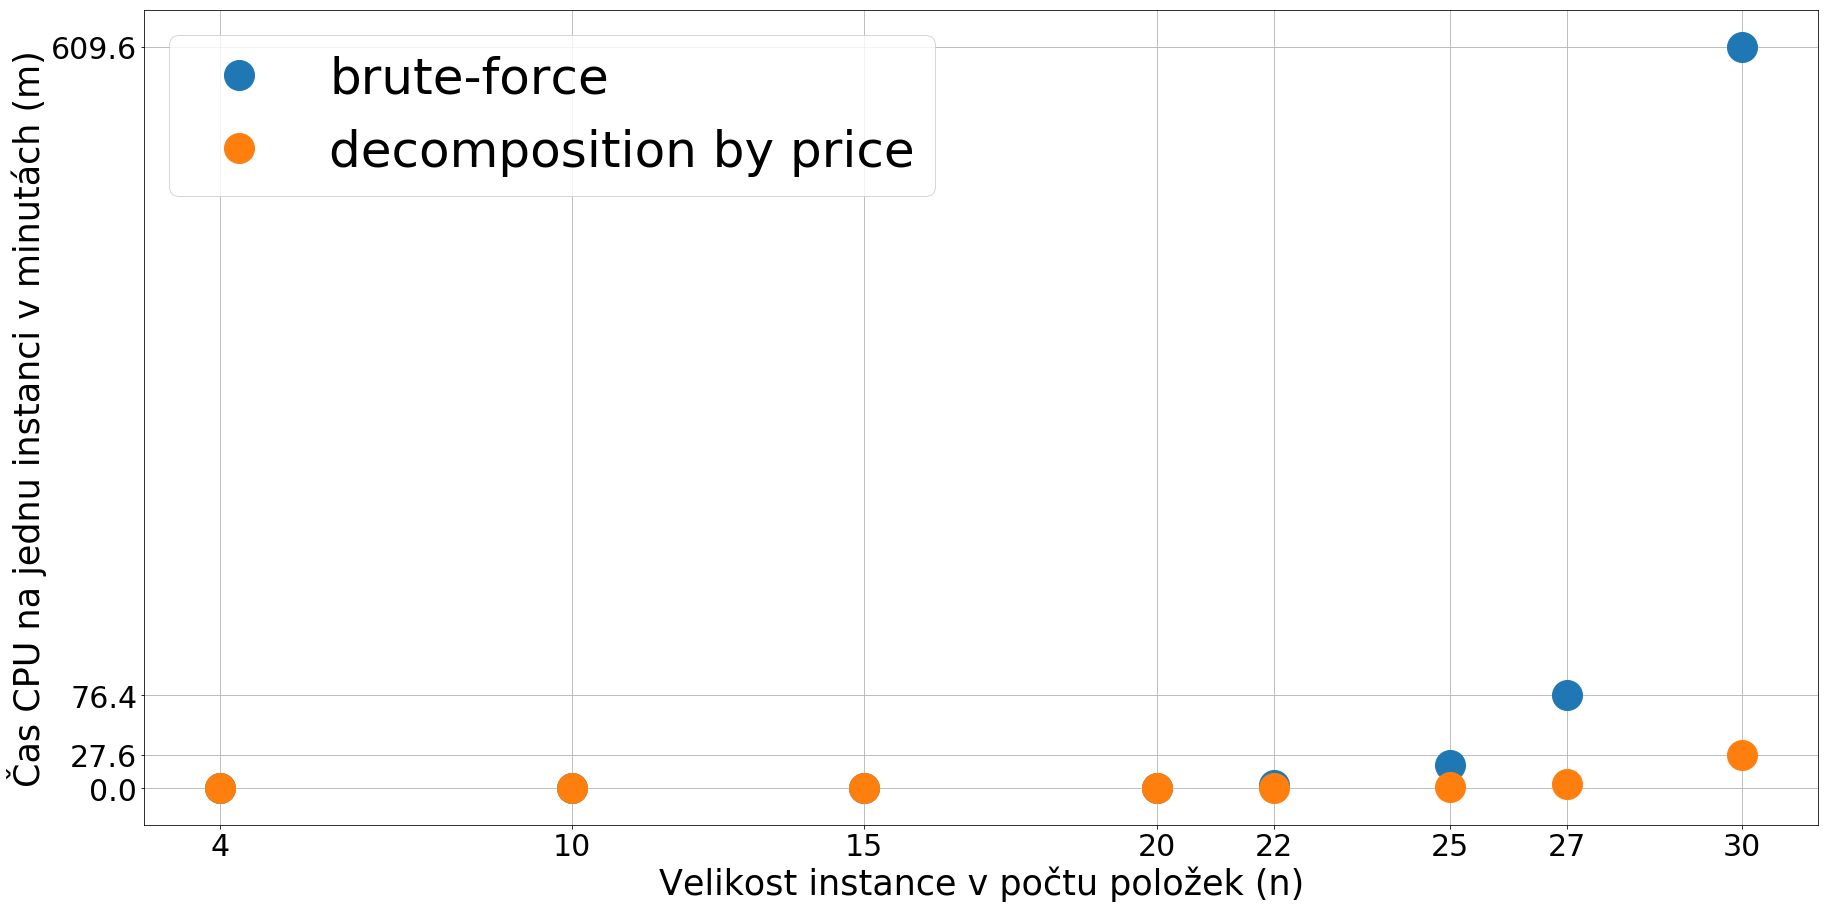

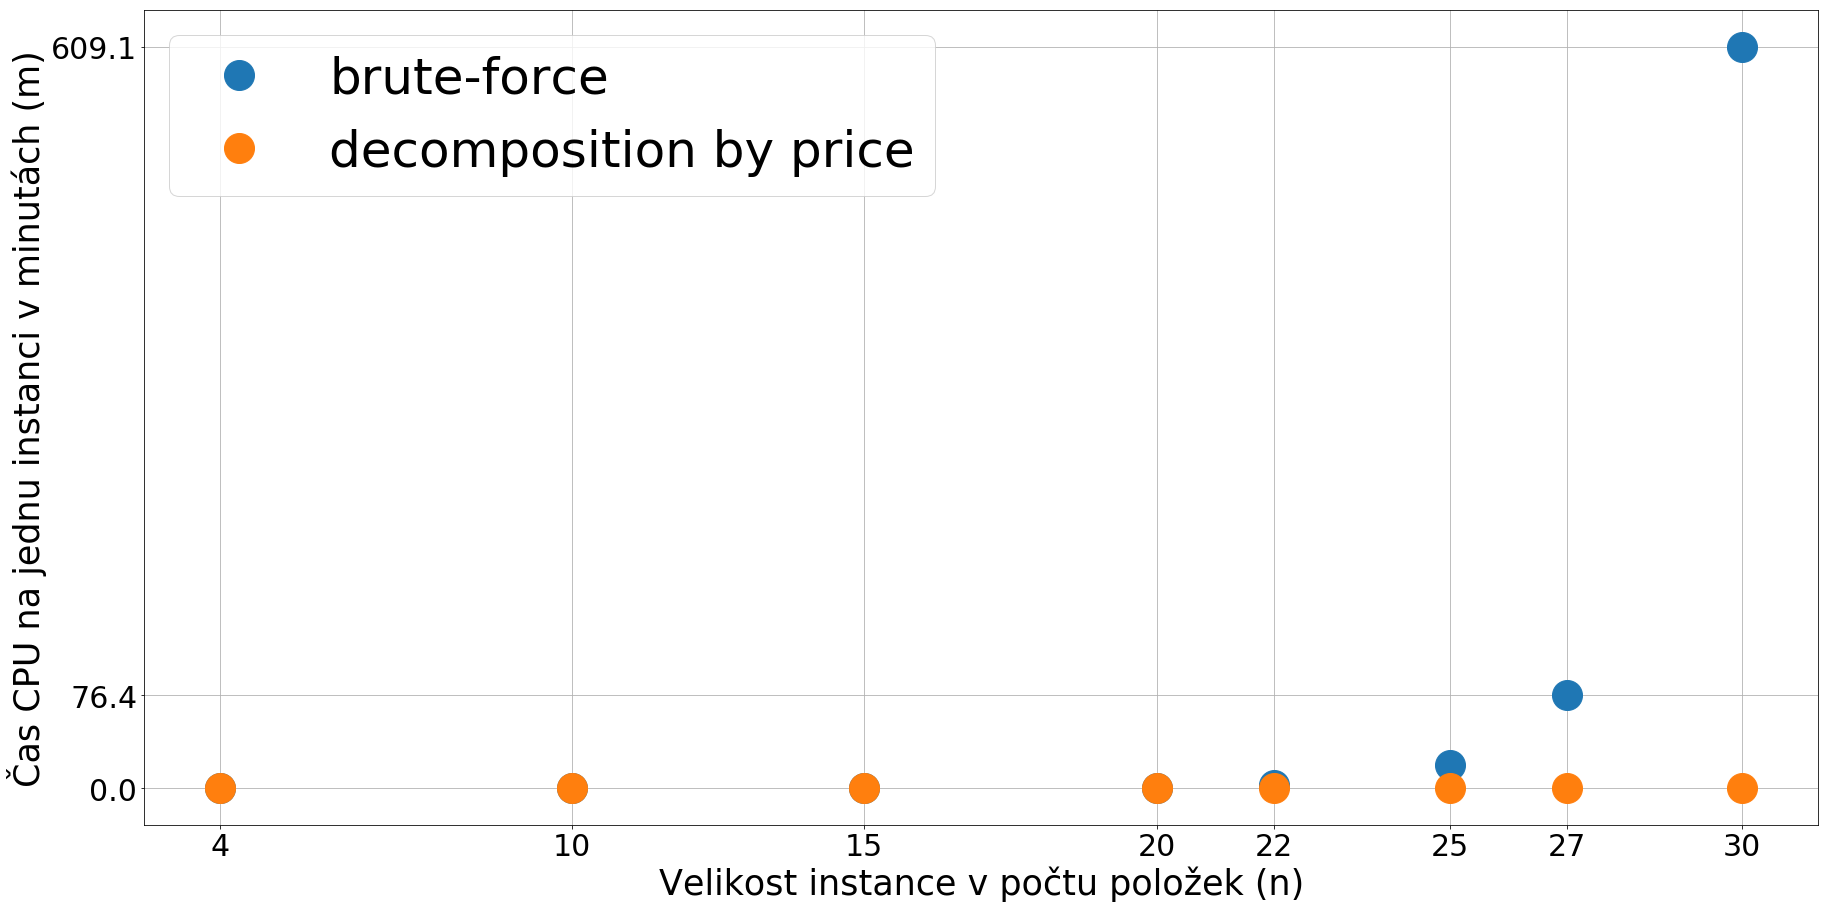

In [4]:
do_plot(30, 15, timeMean.index, timeMean[['tB', 'tDC']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v minutách (m)",
        ['brute-force', 'decomposition by price'], "tBavg.pdf", 30, 6000)
do_plot(30, 15, timeMean.index, timeMedian[['tB', 'tDC']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v minutách (m)",
        ['brute-force', 'decomposition by price'], "tB50.pdf", 30, 6000)

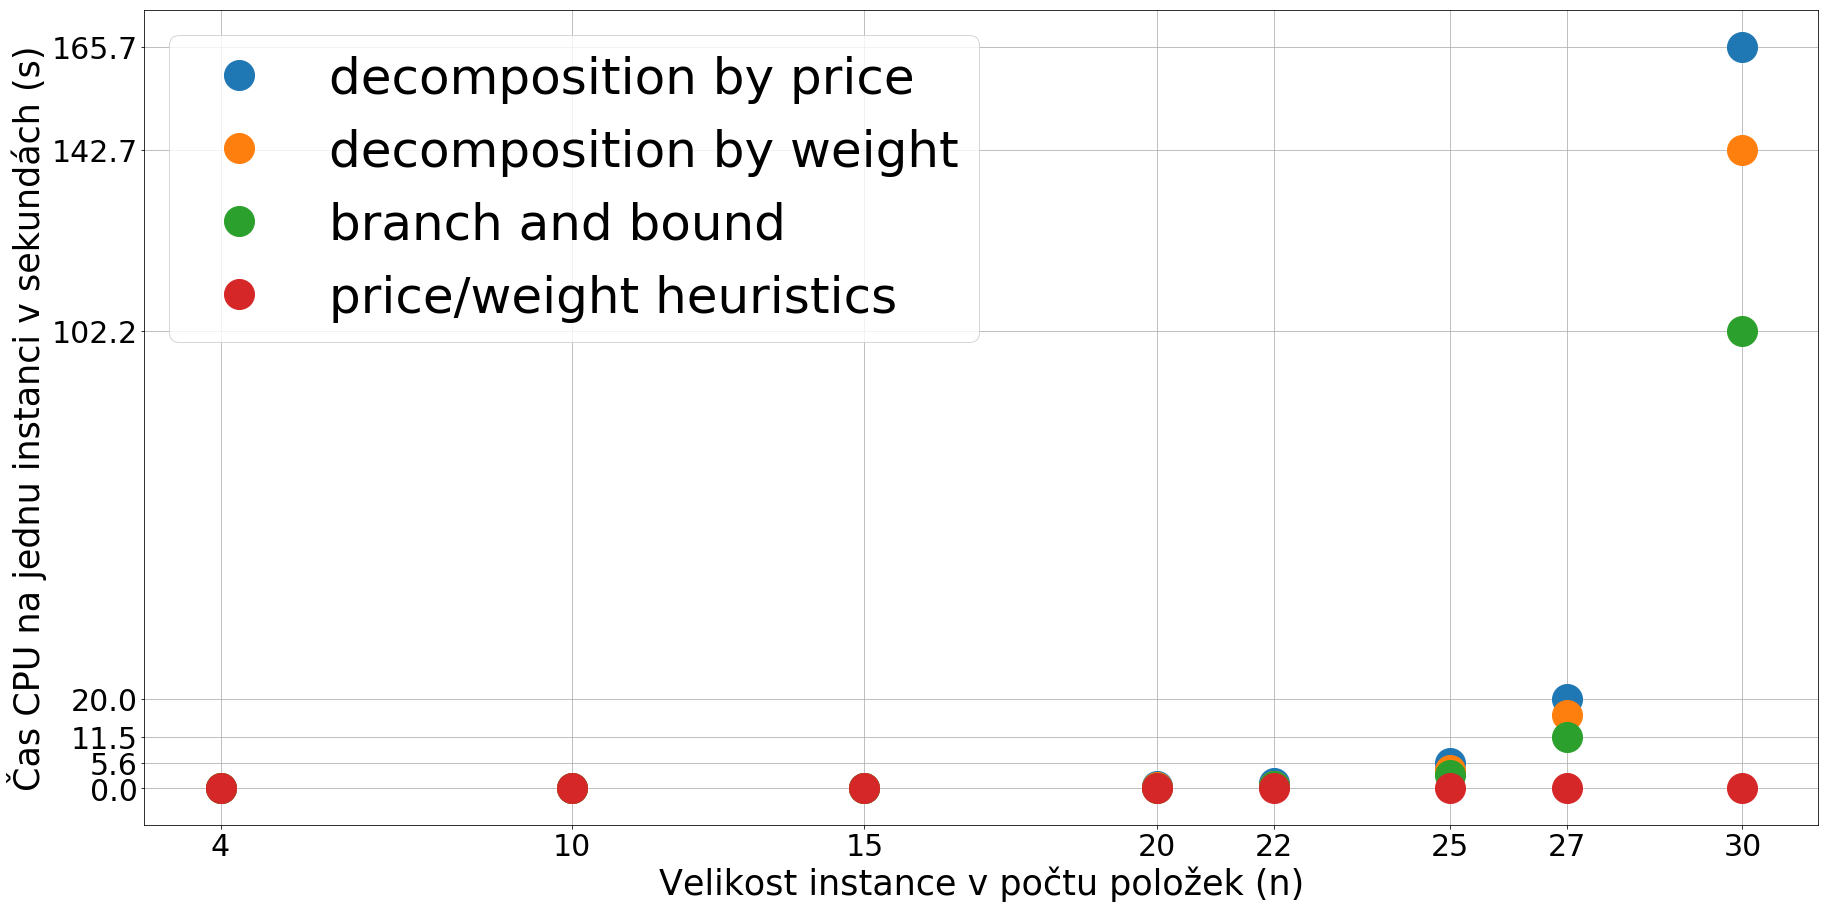

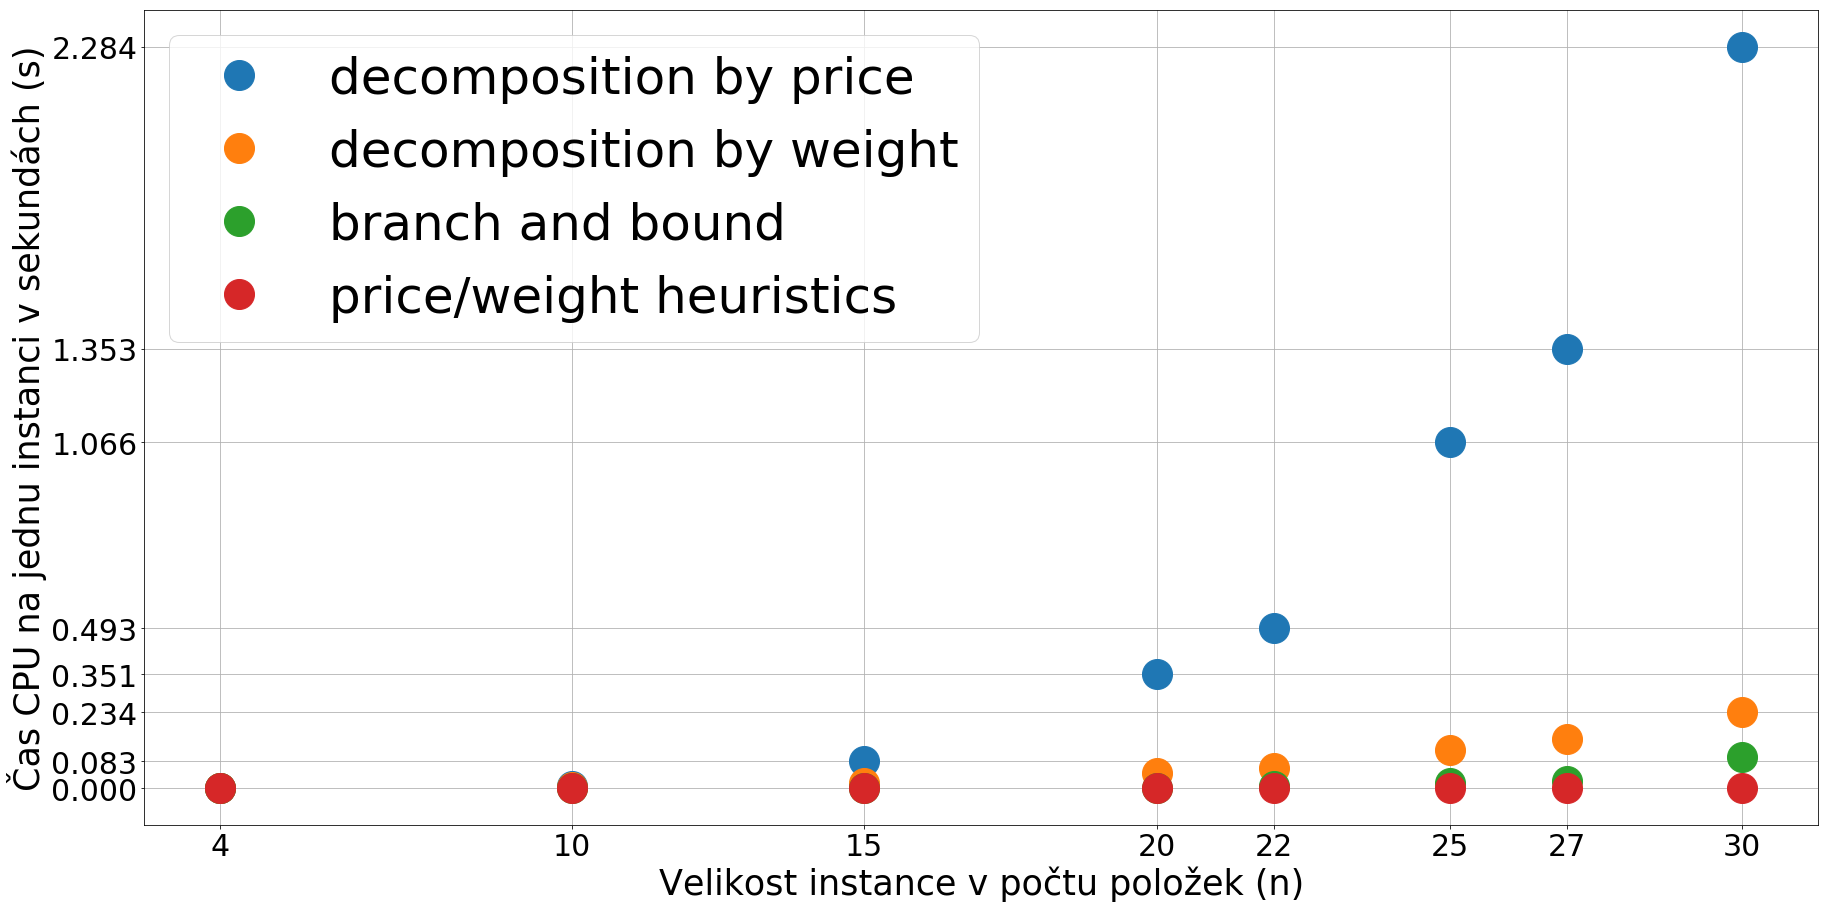

In [5]:
do_plot(30, 15, timeMean.index, timeMean[['tDC', 'tDW', 'tBB', 'tH']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)",
        ['decomposition by price', 'decomposition by weight', 'branch and bound', 'price/weight heuristics'], 
        "tDavg.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tDC', 'tDW', 'tBB', 'tH']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)",
        ['decomposition by price', 'decomposition by weight', 'branch and bound', 'price/weight heuristics'], 
        "tD50.pdf", 30, 1000)

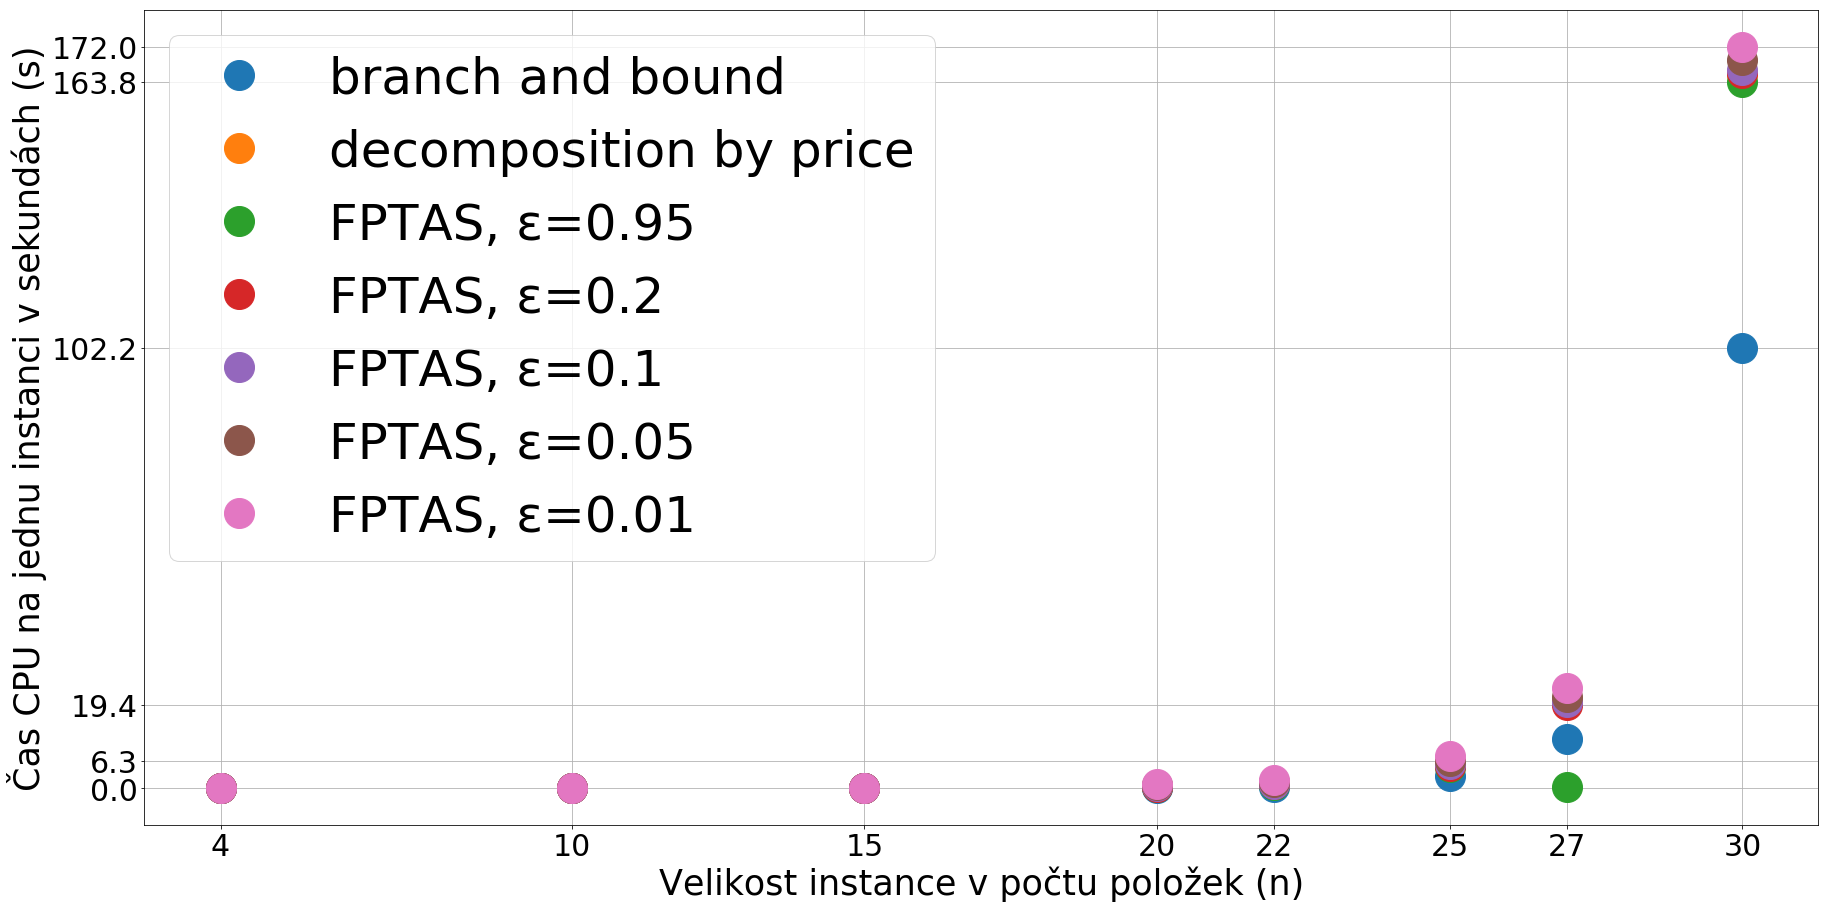

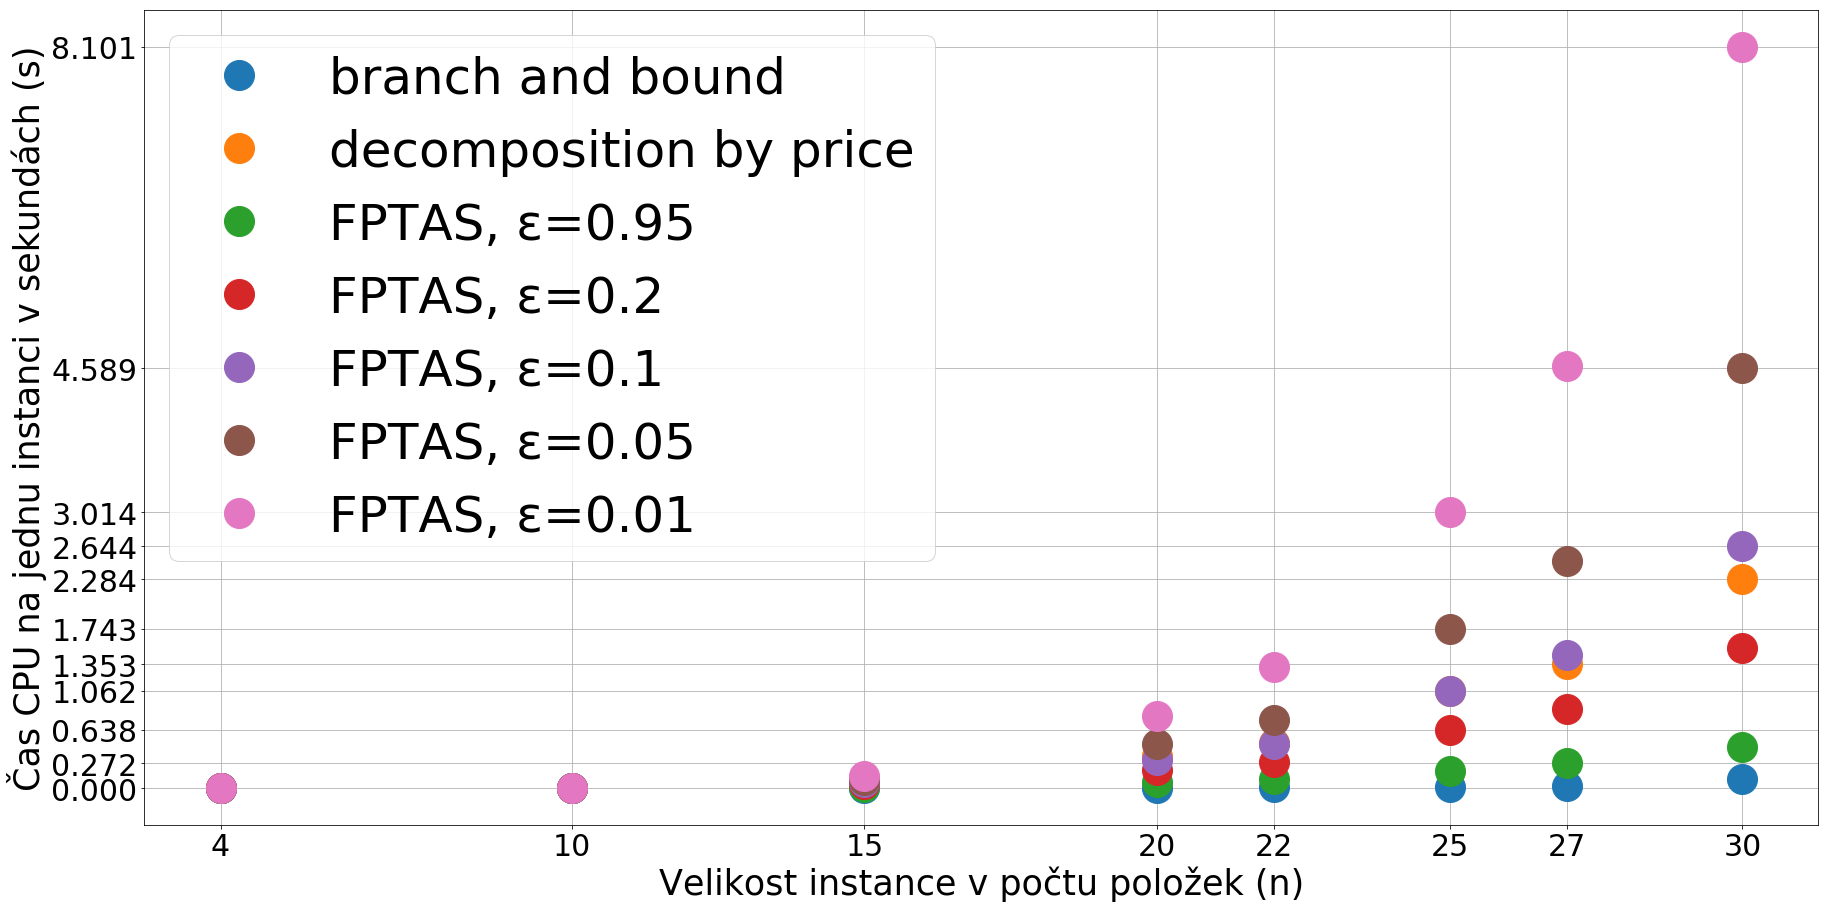

In [6]:
do_plot(30, 15, timeMean.index, timeMean[['tBB','tDC','tFPTASeps0.95','tFPTASeps0.2','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ['branch and bound', 'decomposition by price', 'FPTAS, ε=0.95','FPTAS, ε=0.2',
        'FPTAS, ε=0.1', 'FPTAS, ε=0.05', 'FPTAS, ε=0.01'], "FPTAS1avg.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tBB','tDC', 'tFPTASeps0.95','tFPTASeps0.2','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ['branch and bound','decomposition by price','FPTAS, ε=0.95','FPTAS, ε=0.2',
        'FPTAS, ε=0.1', 'FPTAS, ε=0.05', 'FPTAS, ε=0.01'], "FPTAS150.pdf", 30, 1000)

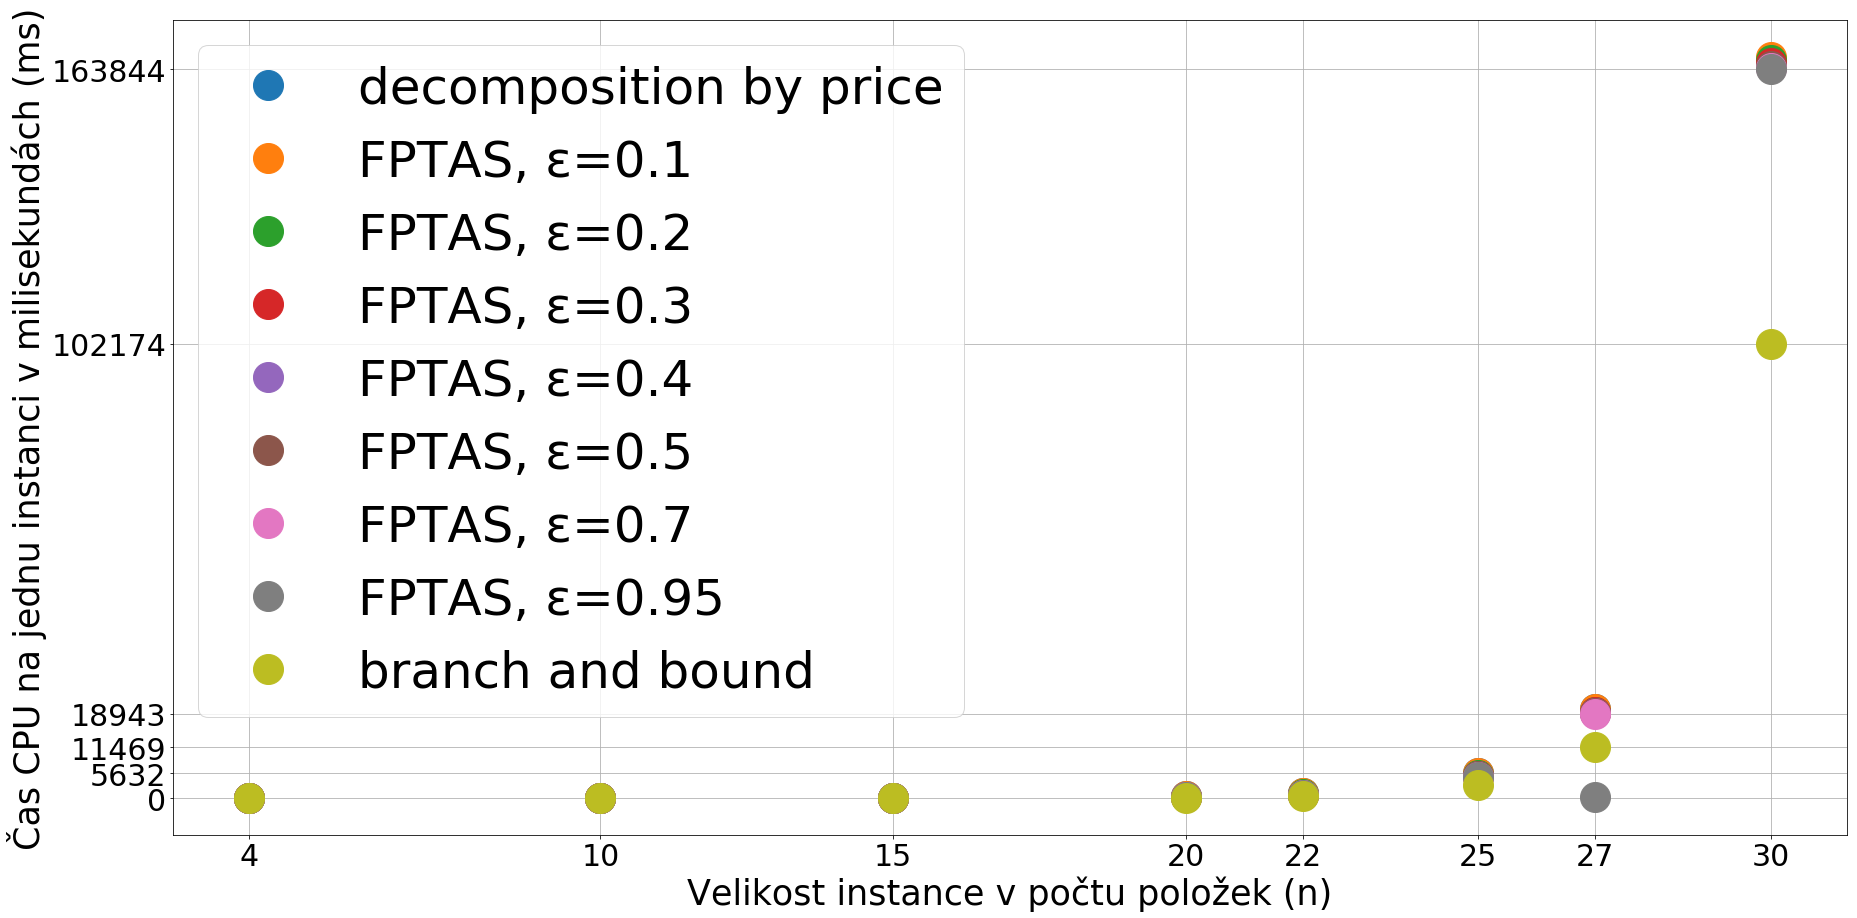

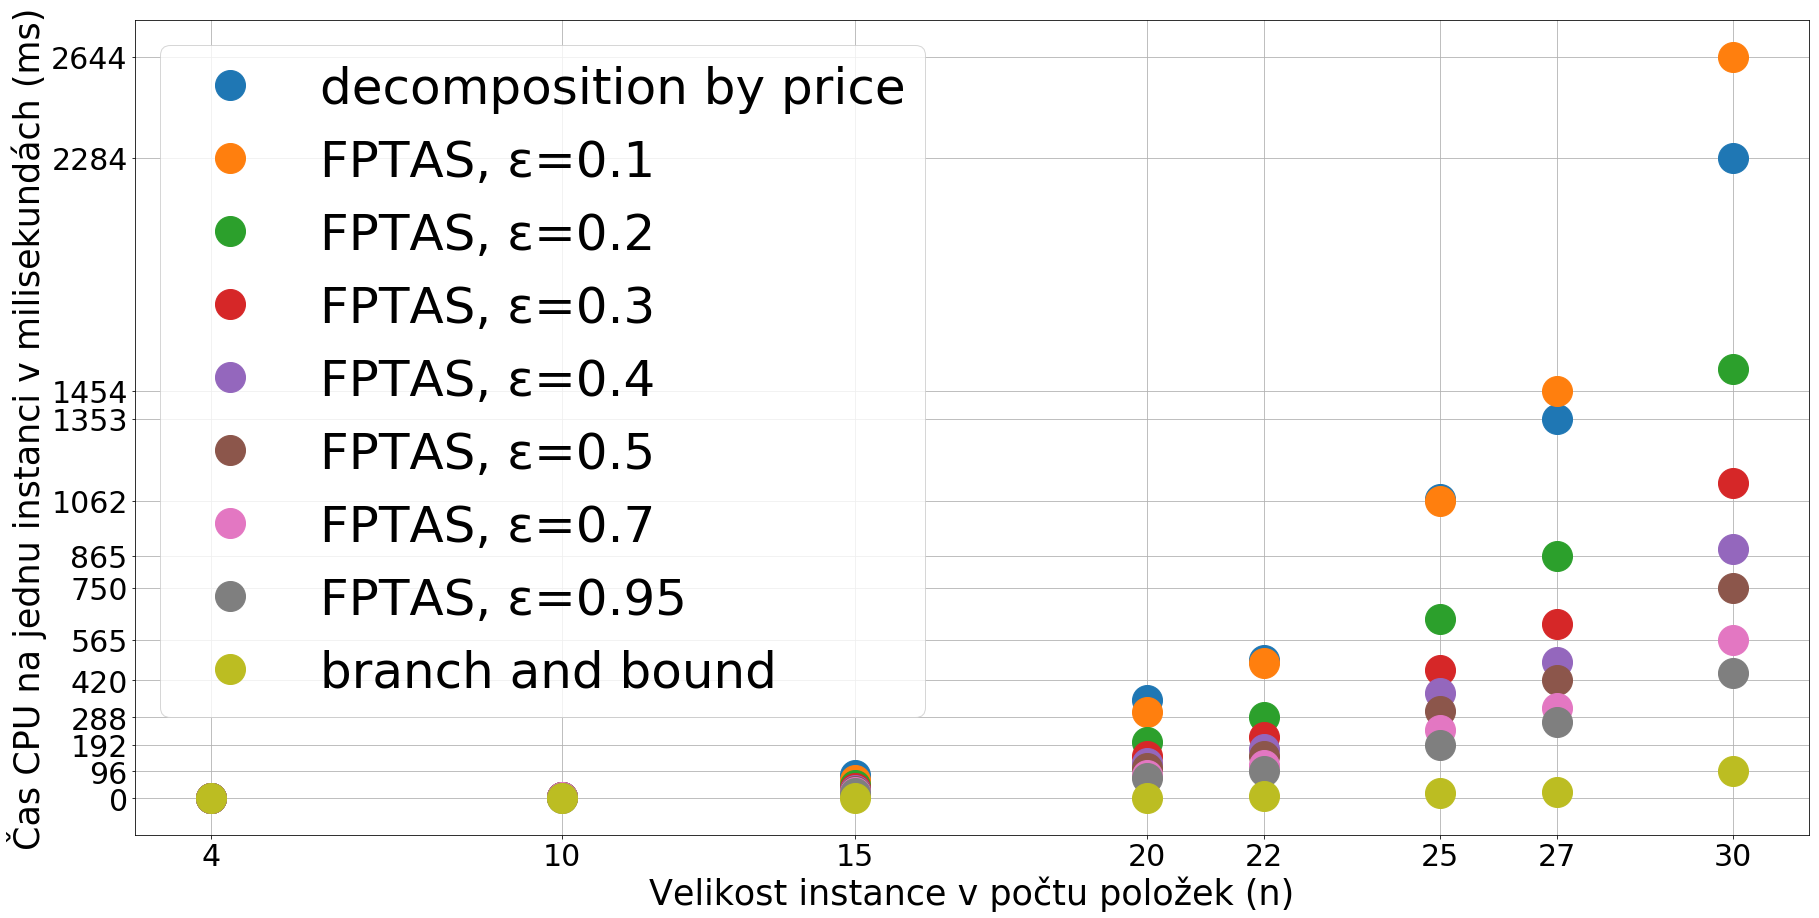

In [7]:
do_plot(30, 15, timeMean.index, timeMean[['tDC','tFPTASeps0.1',
                                          'tFPTASeps0.2','tFPTASeps0.3',
                                        'tFPTASeps0.4','tFPTASeps0.5','tFPTASeps0.7','tFPTASeps0.95', 'tBB']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v milisekundách (ms)", 
        ['decomposition by price', 'FPTAS, ε=0.1', 'FPTAS, ε=0.2','FPTAS, ε=0.3','FPTAS, ε=0.4',
         'FPTAS, ε=0.5','FPTAS, ε=0.7','FPTAS, ε=0.95','branch and bound'], 
        "FPTASavg.pdf", 30, 1)
do_plot(30, 15, timeMean.index, timeMedian[['tDC','tFPTASeps0.1',
                                          'tFPTASeps0.2','tFPTASeps0.3',
                                        'tFPTASeps0.4','tFPTASeps0.5','tFPTASeps0.7','tFPTASeps0.95', 'tBB']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v milisekundách (ms)", 
        ['decomposition by price','FPTAS, ε=0.1', 'FPTAS, ε=0.2','FPTAS, ε=0.3','FPTAS, ε=0.4',
         'FPTAS, ε=0.5','FPTAS, ε=0.7','FPTAS, ε=0.95','branch and bound'], 
        "FPTAS50.pdf", 30, 1)


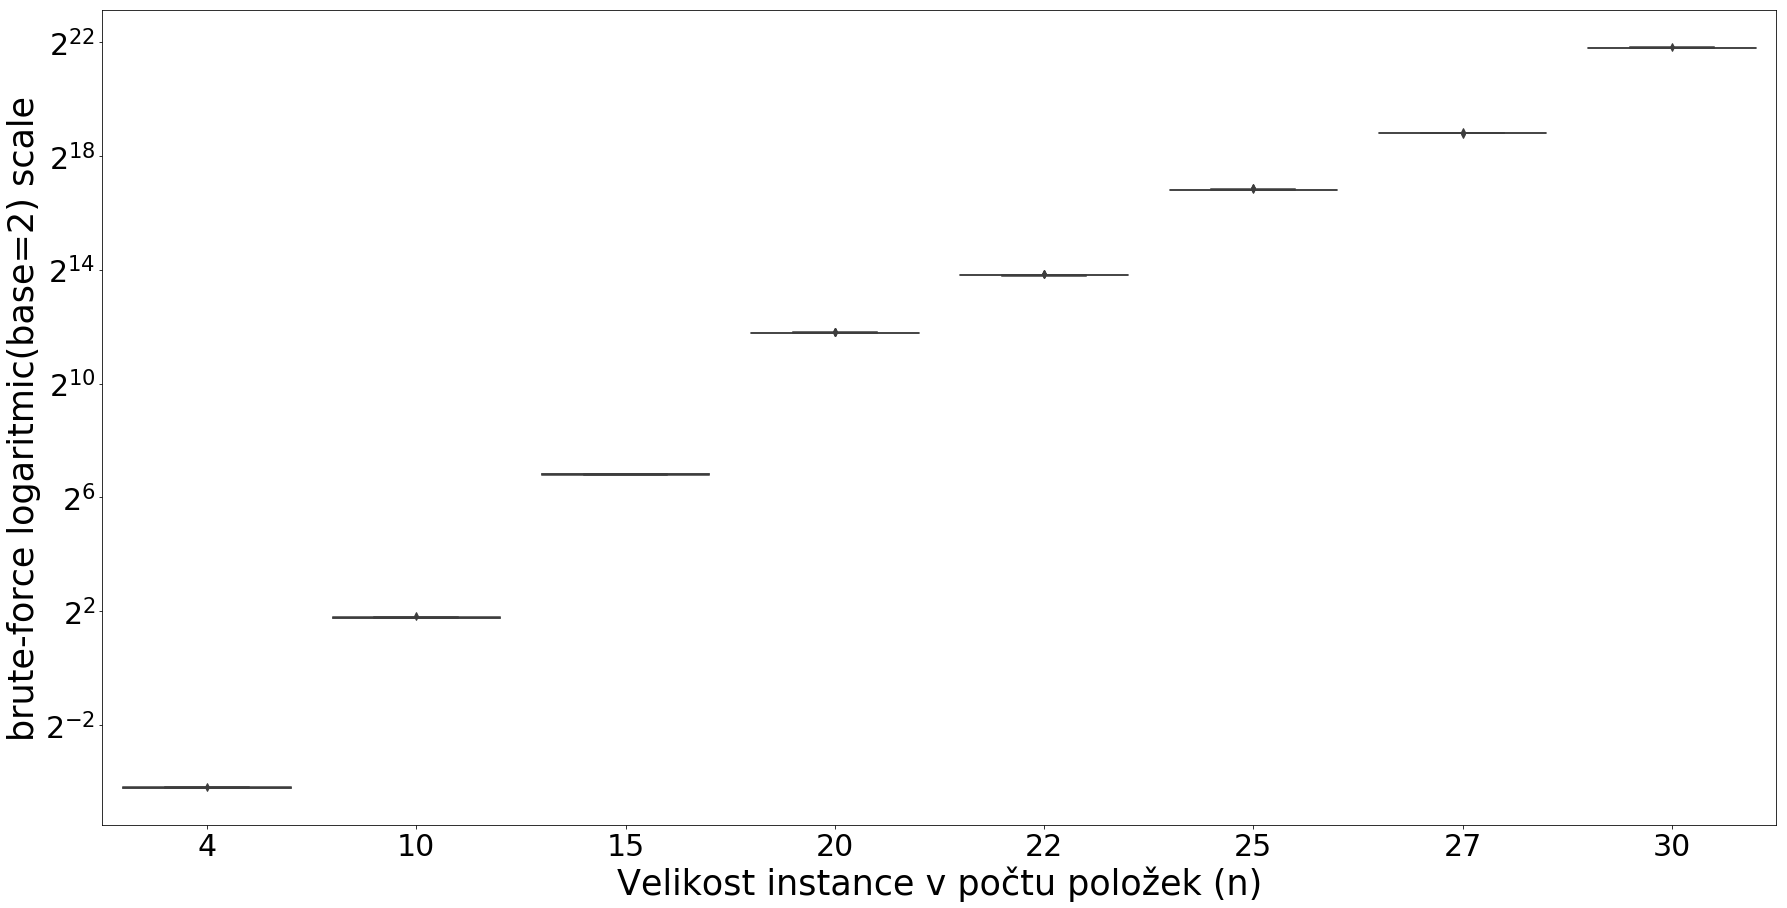

In [8]:
do_box_plot('n', 'tB', RAW_DATA, 'Velikost instance v počtu položek (n)',
            'brute-force logaritmic(base=2) scale', 'boxB.pdf')

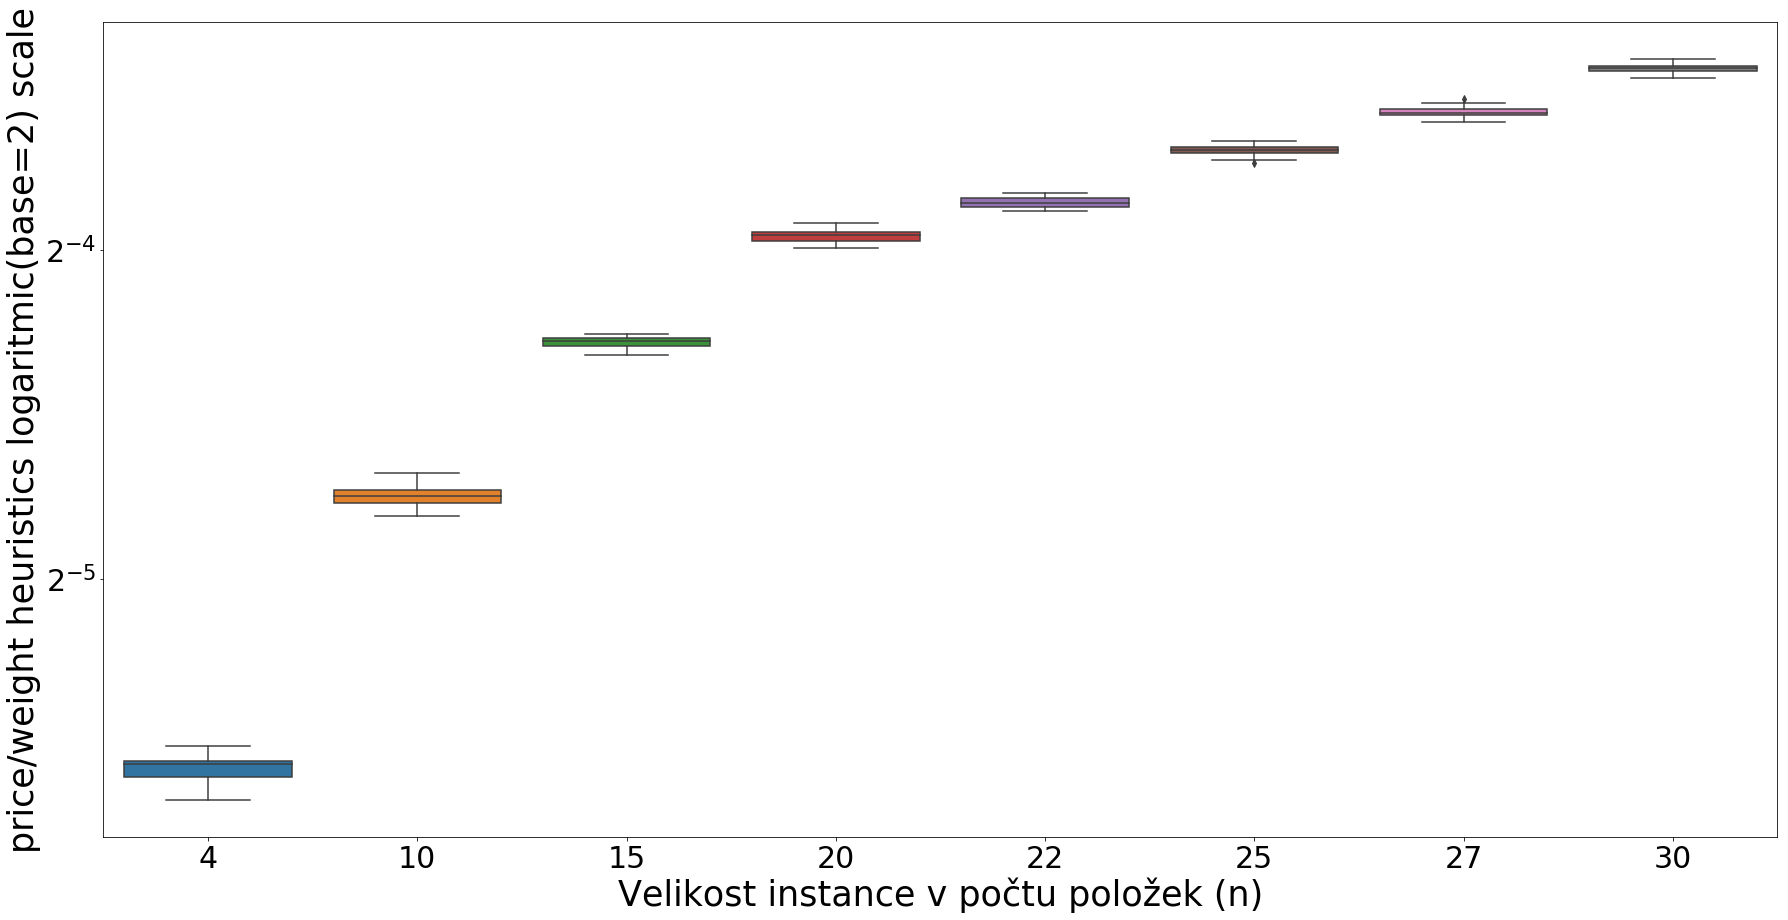

In [9]:
do_box_plot('n', 'tH', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'price/weight heuristics logaritmic(base=2) scale', 'boxH.pdf')

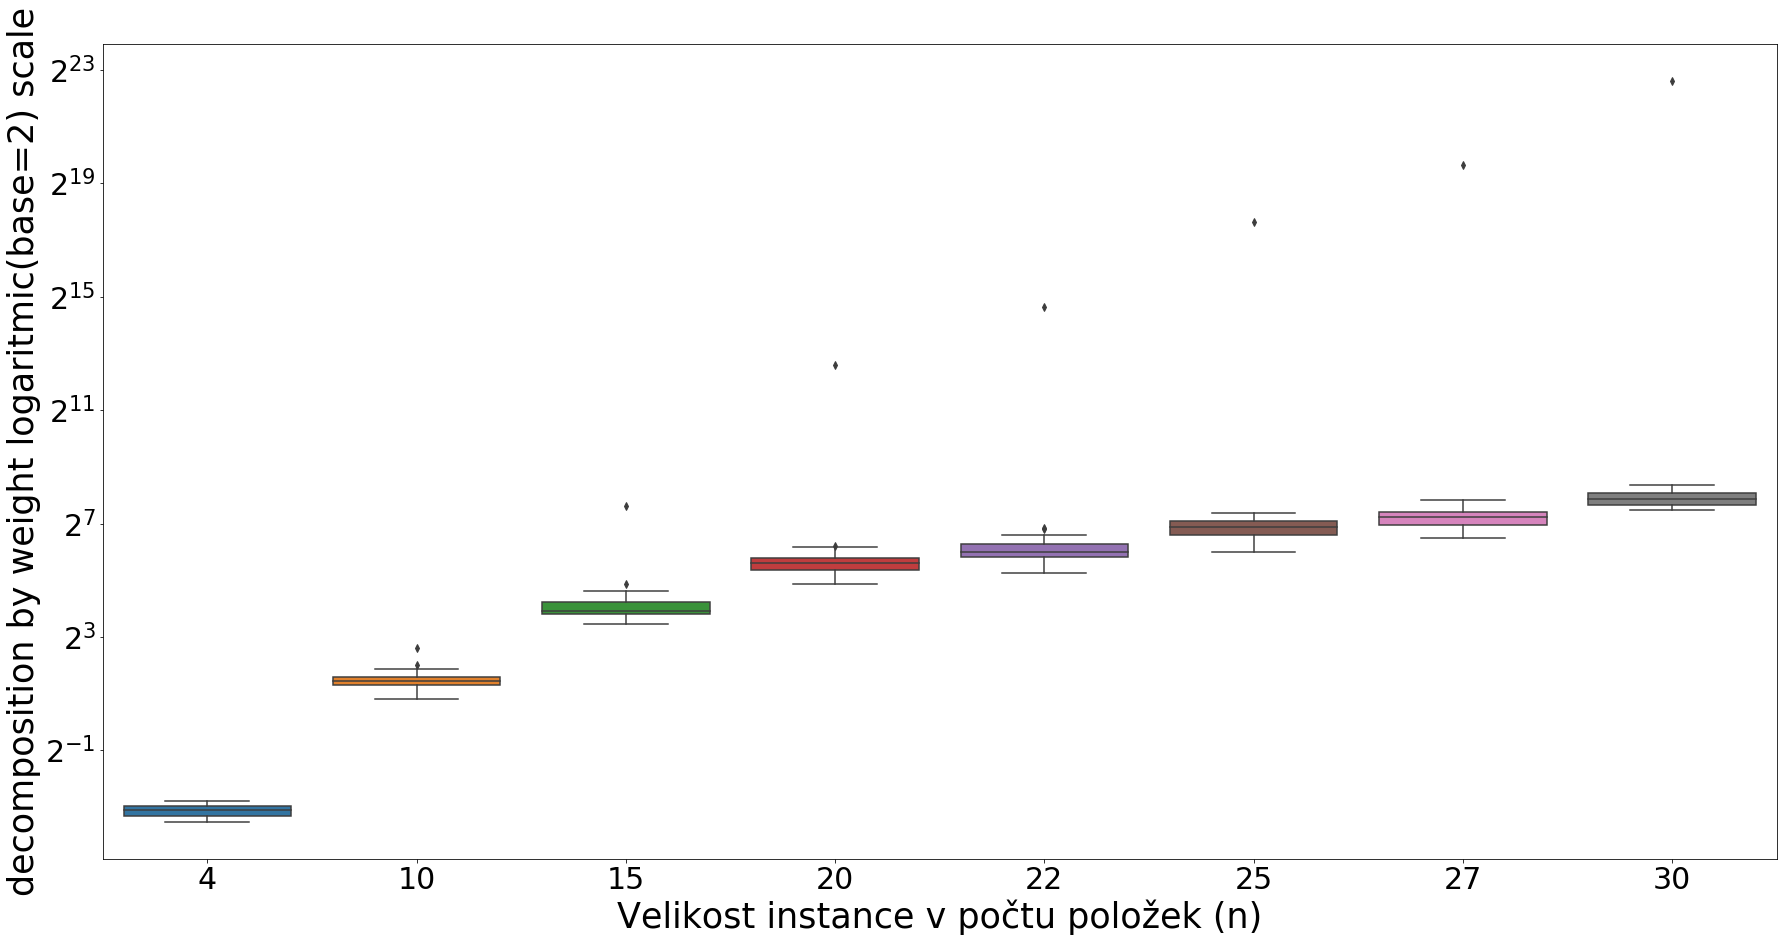

In [10]:
do_box_plot('n', 'tDW', RAW_DATA, 'Velikost instance v počtu položek (n)',
            'decomposition by weight logaritmic(base=2) scale', 'boxDW.pdf')

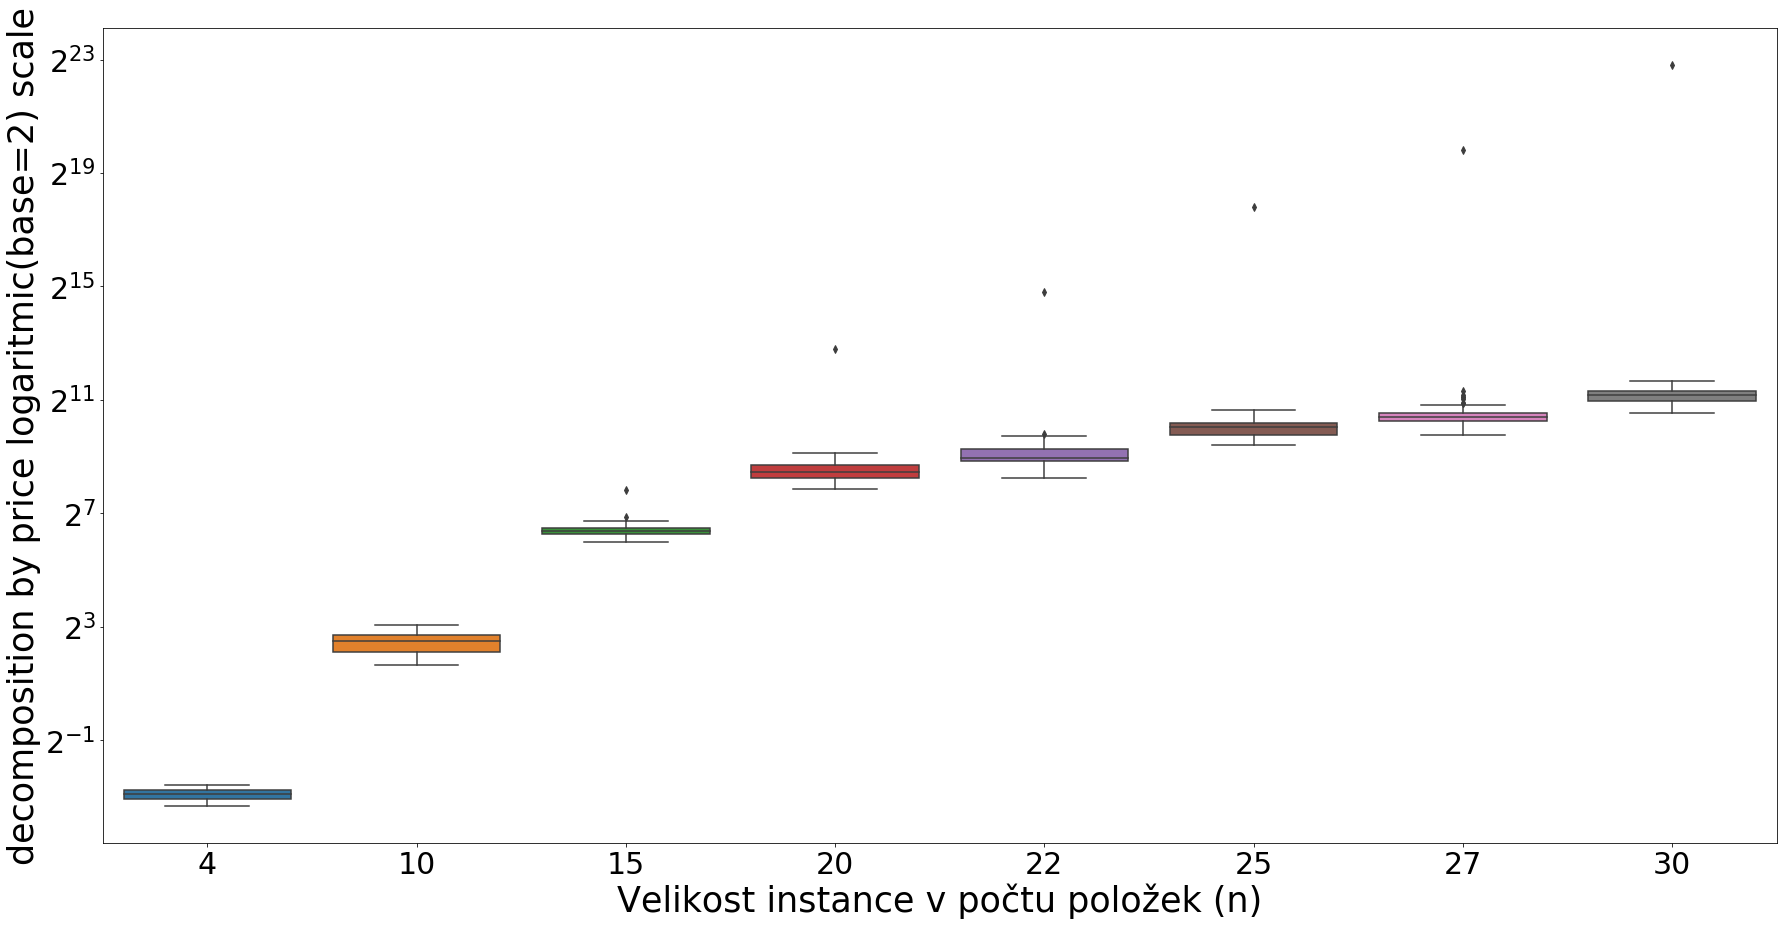

In [11]:
do_box_plot('n', 'tDC', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'decomposition by price logaritmic(base=2) scale', 'boxDC.pdf')

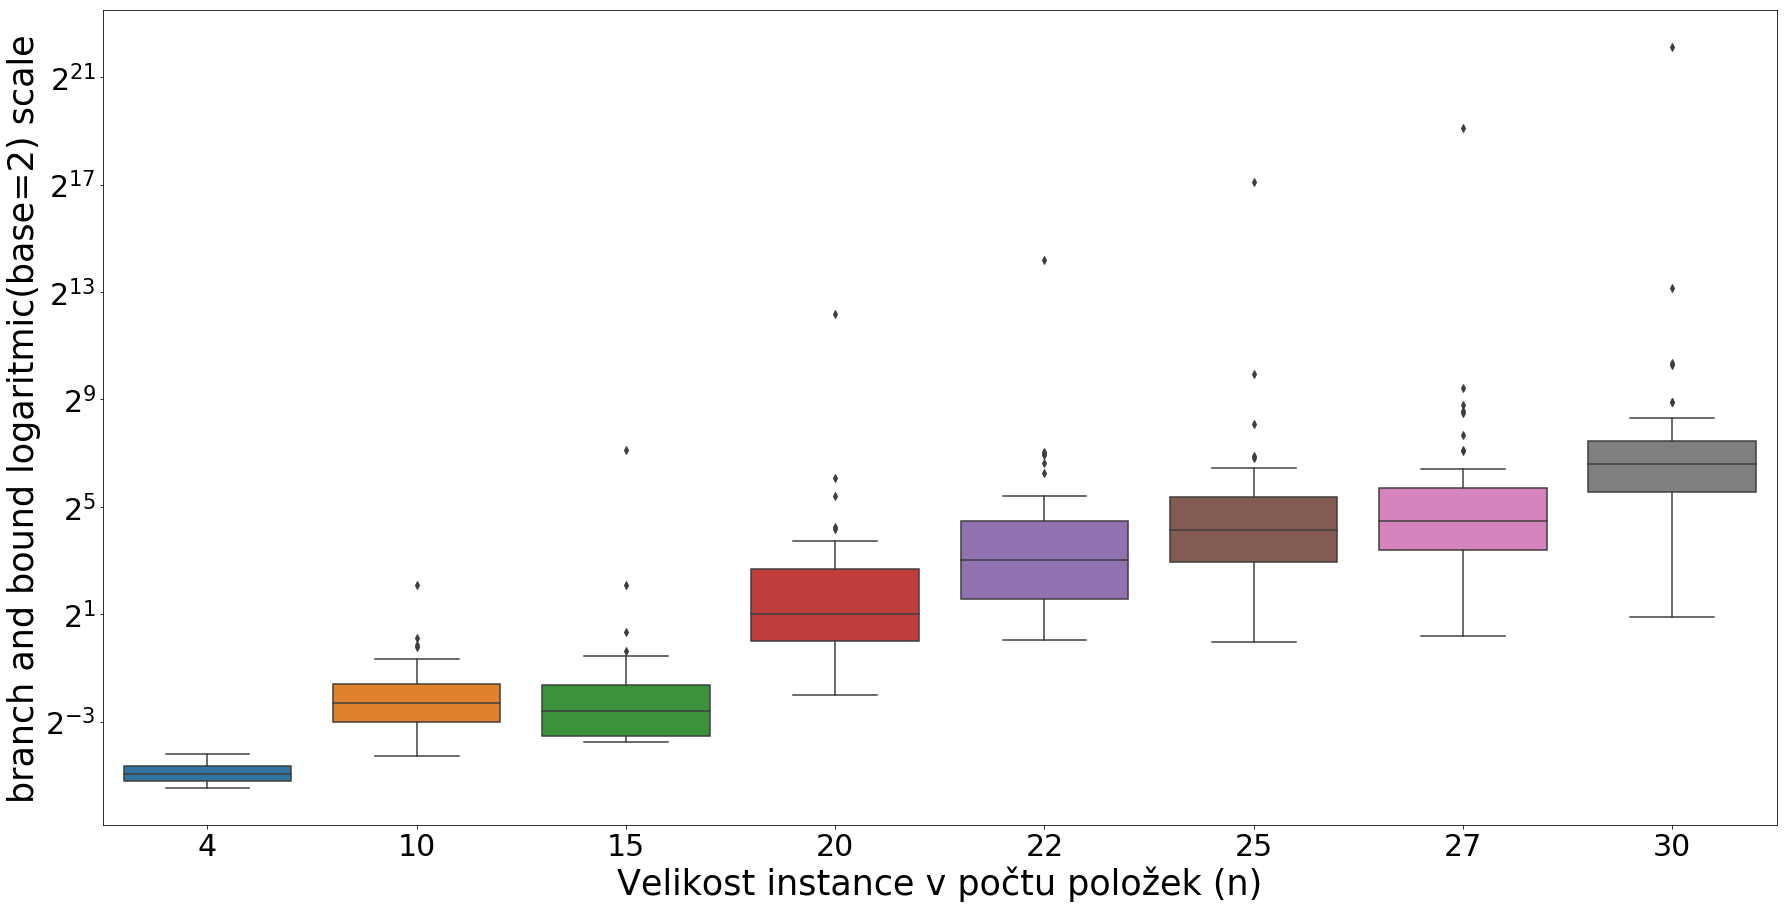

In [12]:
do_box_plot('n', 'tBB', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'branch and bound logaritmic(base=2) scale', 'boxBB.pdf')

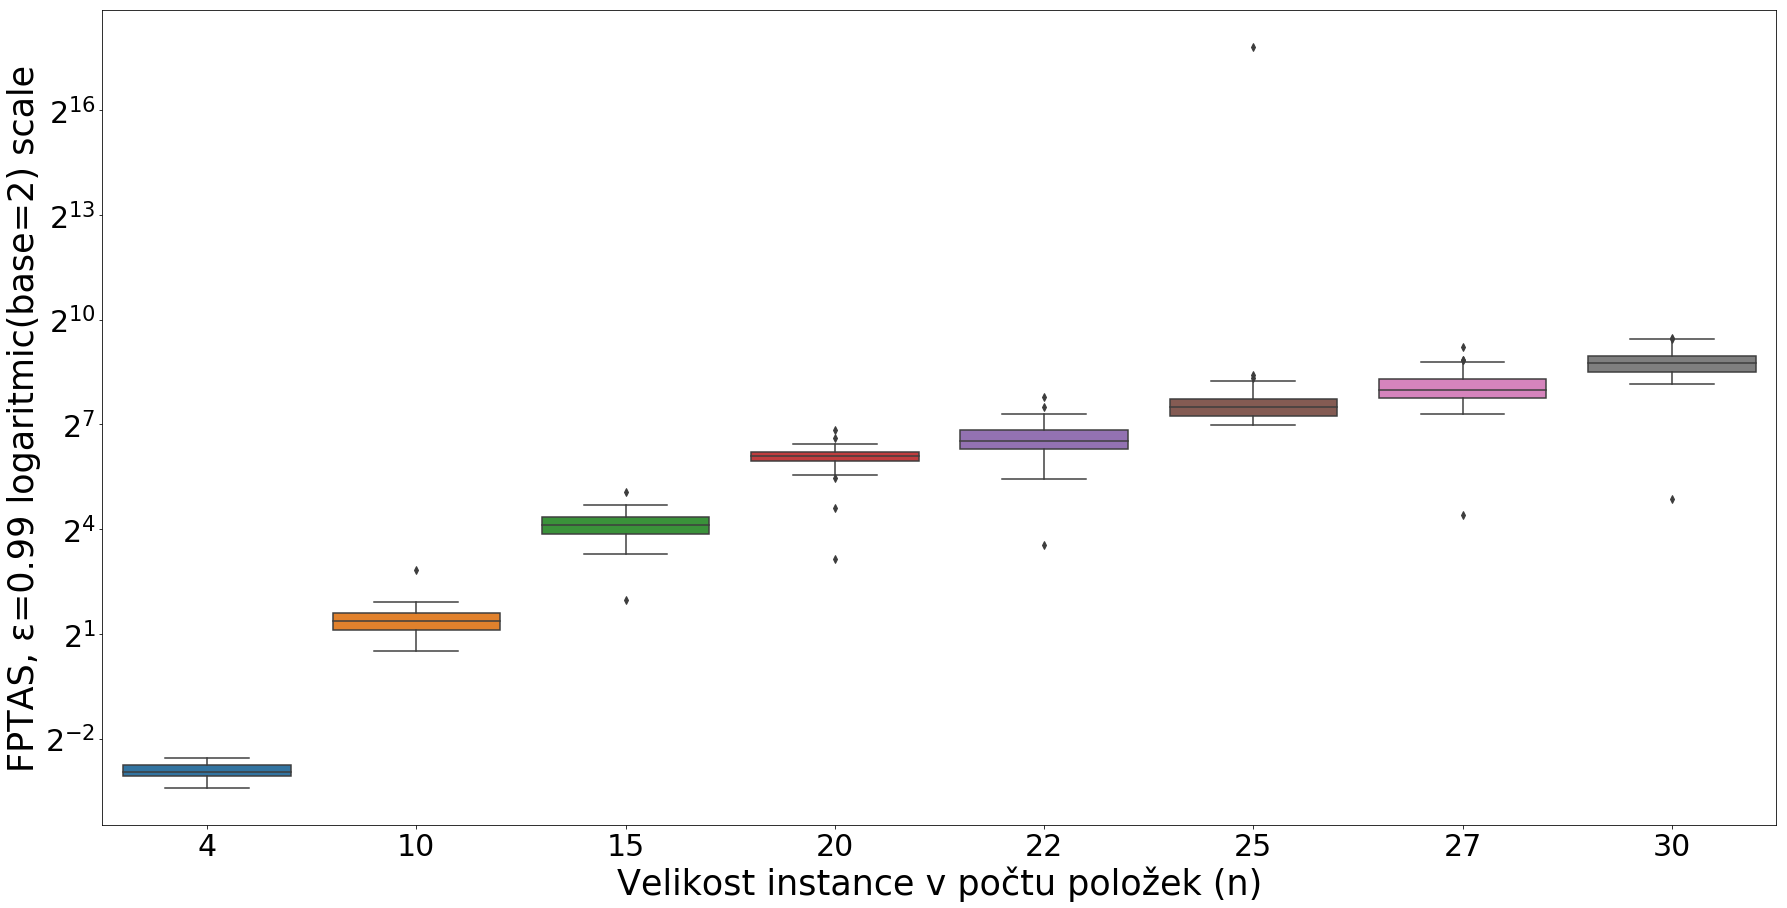

In [13]:
do_box_plot('n', 'tFPTASeps0.99', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'FPTAS, ε=0.99 logaritmic(base=2) scale', 'boxF99.pdf')

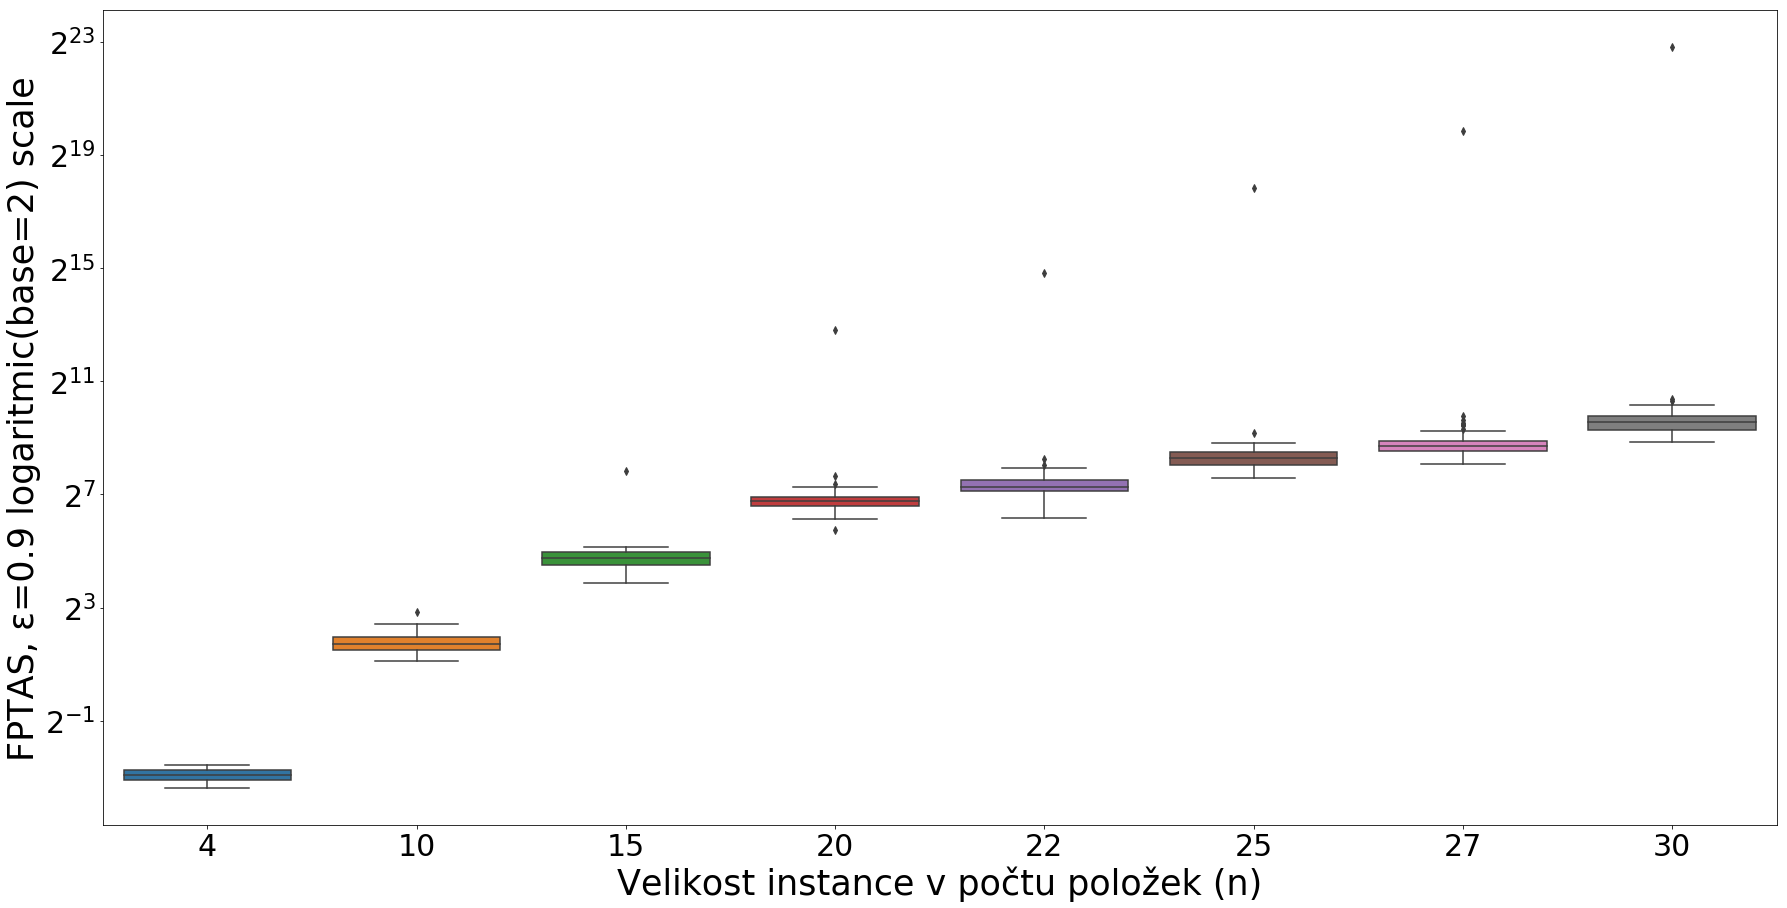

In [14]:
do_box_plot('n', 'tFPTASeps0.5', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'FPTAS, ε=0.9 logaritmic(base=2) scale', 'boxF50.pdf')

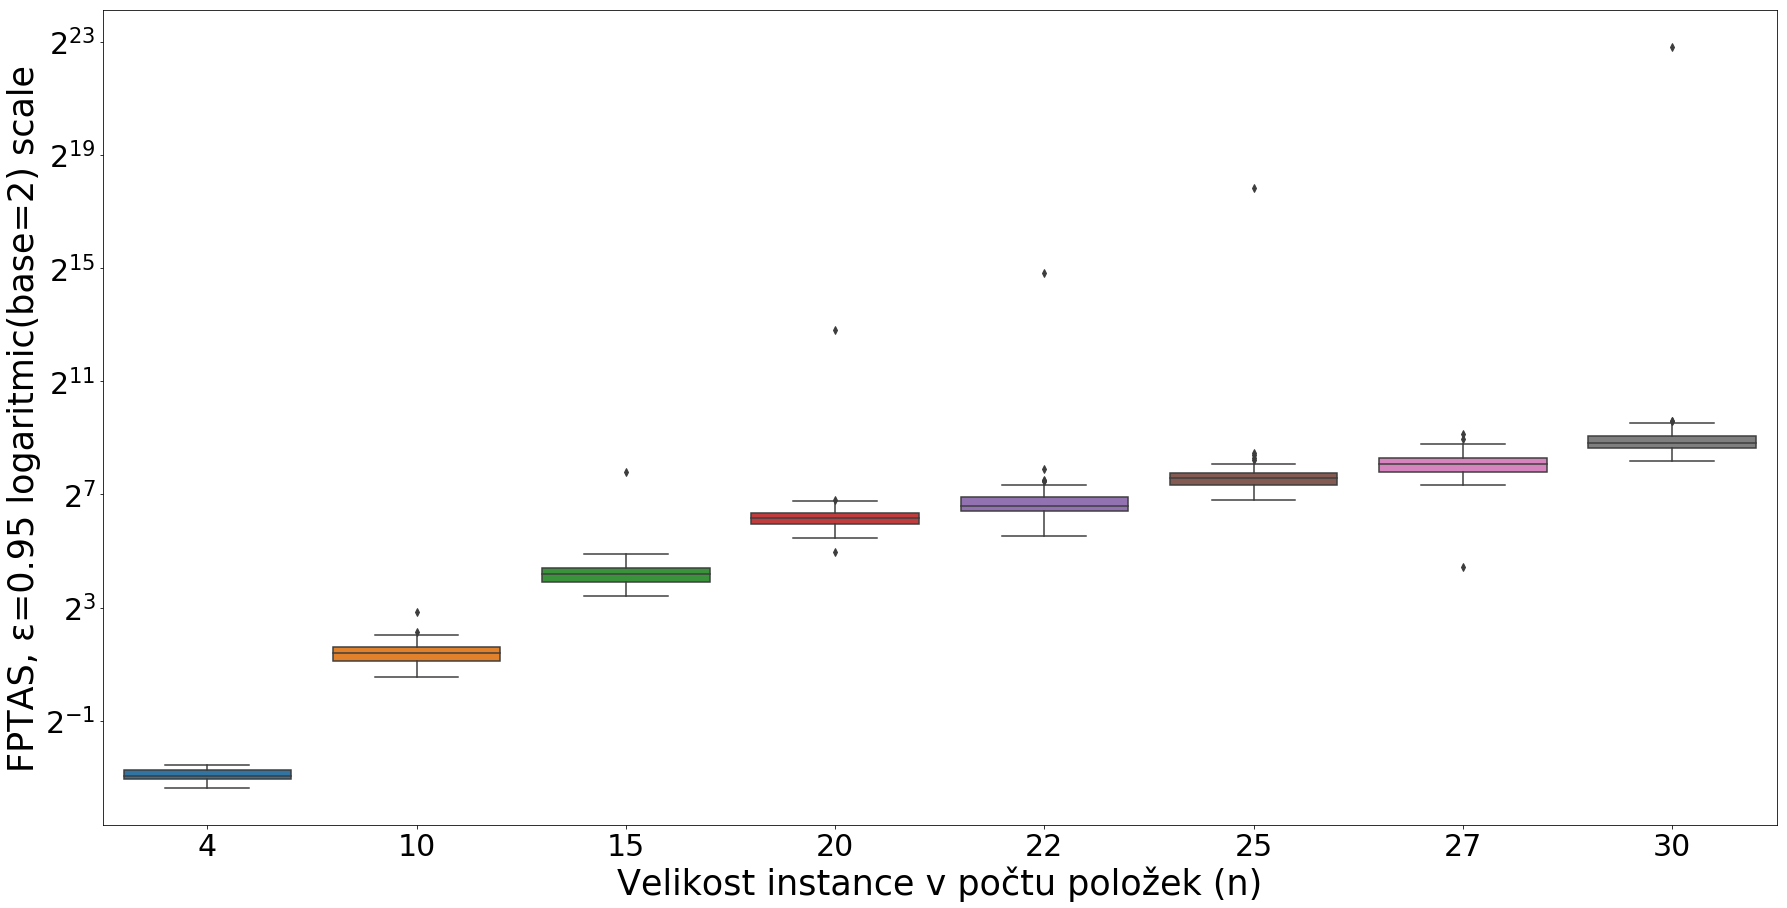

In [15]:
do_box_plot('n', 'tFPTASeps0.95', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'FPTAS, ε=0.95 logaritmic(base=2) scale', 'boxF95.pdf')

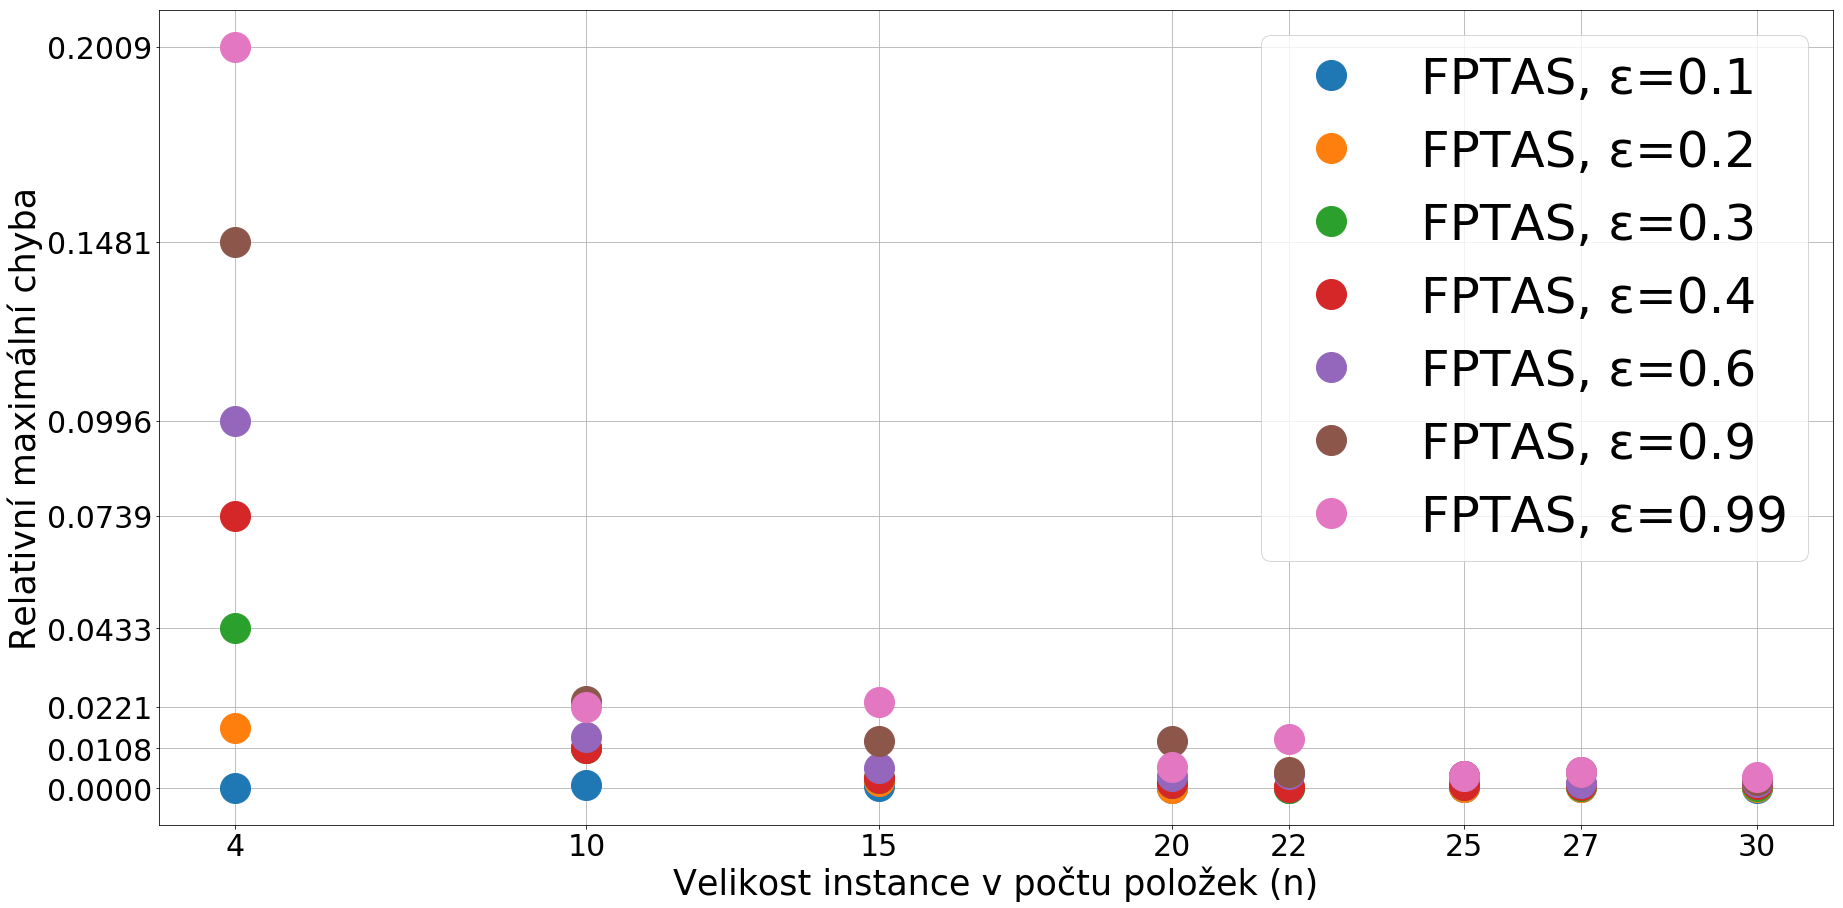

In [16]:
do_plot(30, 15, errorMean.index, errorMax[['errFPTASeps0.1','errFPTASeps0.2',\
       'errFPTASeps0.3','errFPTASeps0.4','errFPTASeps0.6','errFPTASeps0.9','errFPTASeps0.99']], 
        "Velikost instance v počtu položek (n)", 
        "Relativní maximální chyba", 
        ['FPTAS, ε=0.1','FPTAS, ε=0.2',\
       'FPTAS, ε=0.3', 'FPTAS, ε=0.4','FPTAS, ε=0.6','FPTAS, ε=0.9',\
       'FPTAS, ε=0.99'], 
        "errorFPTAS.pdf", 30, 1)

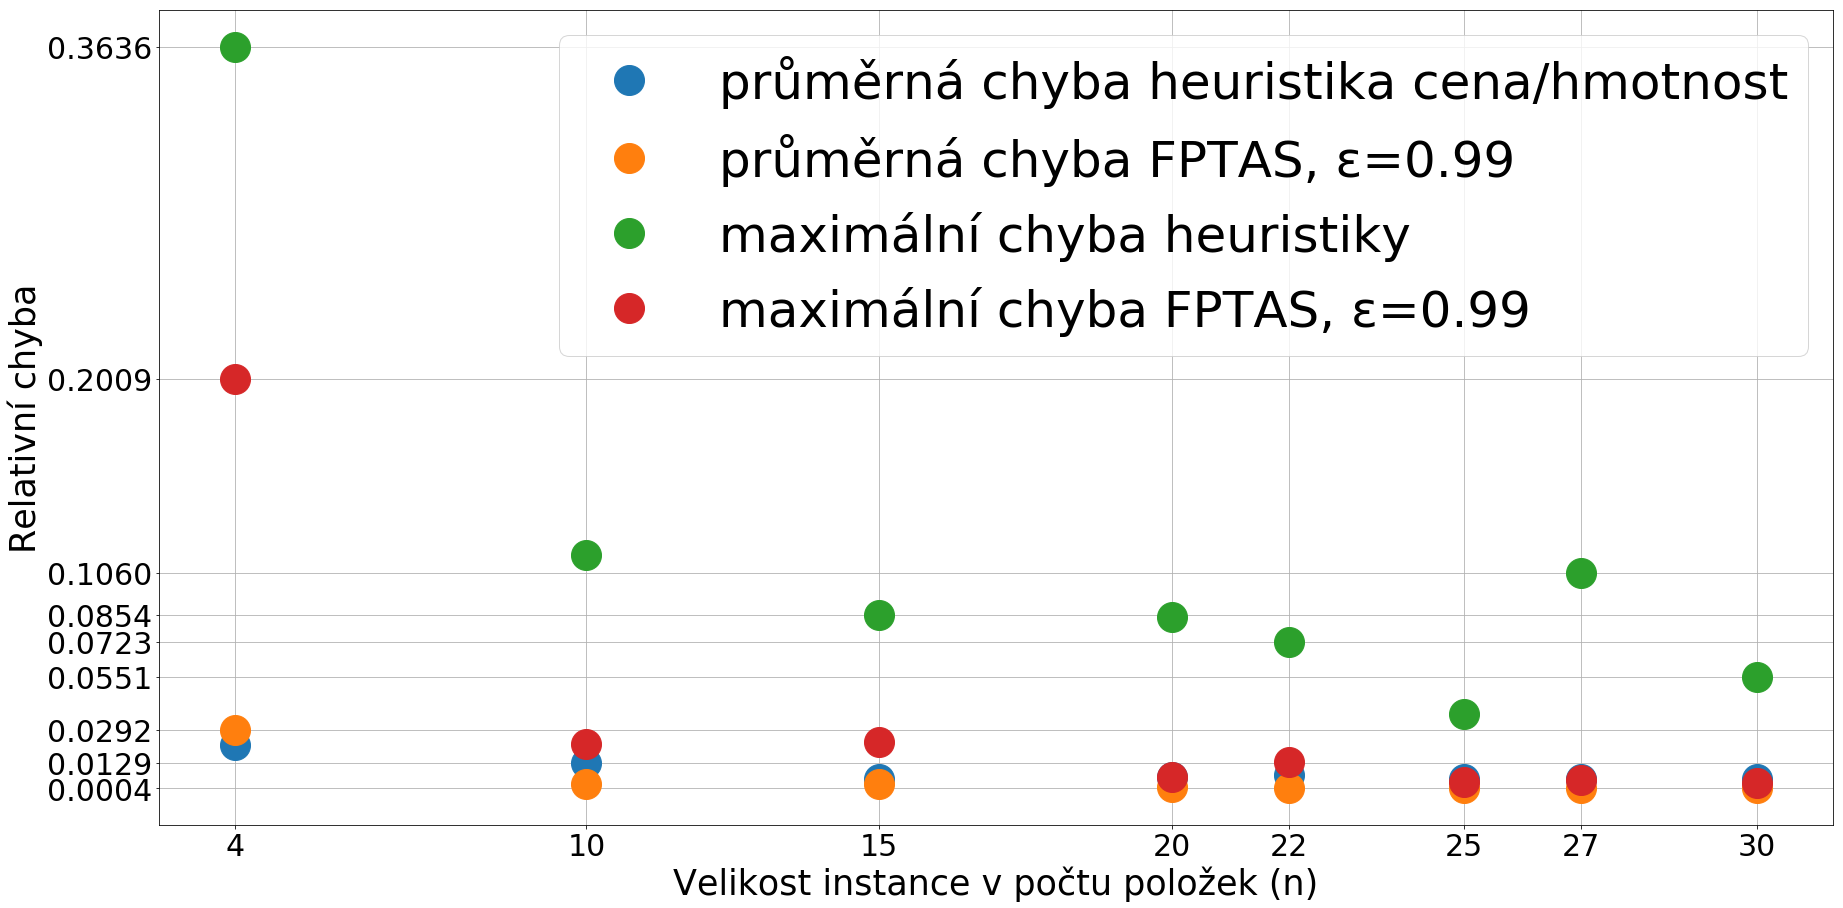

In [17]:
_mean = errorMean[['errH','errFPTASeps0.99']]
_max = errorMax[['errH','errFPTASeps0.99']]
_max.columns = [x+"_max" for x in _max.columns]
data = pd.merge(_mean, _max, on=_mean.index)
data.index = _max.index
data = data.drop('key_0', axis=1)
do_plot(30, 15, errorMean.index, data, 
        "Velikost instance v počtu položek (n)", 
        "Relativní chyba", 
        ['průměrná chyba heuristika cena/hmotnost', 'průměrná chyba FPTAS, ε=0.99',
         'maximální chyba heuristiky', "maximální chyba FPTAS, ε=0.99"], 
        "error.pdf", 30, 1)

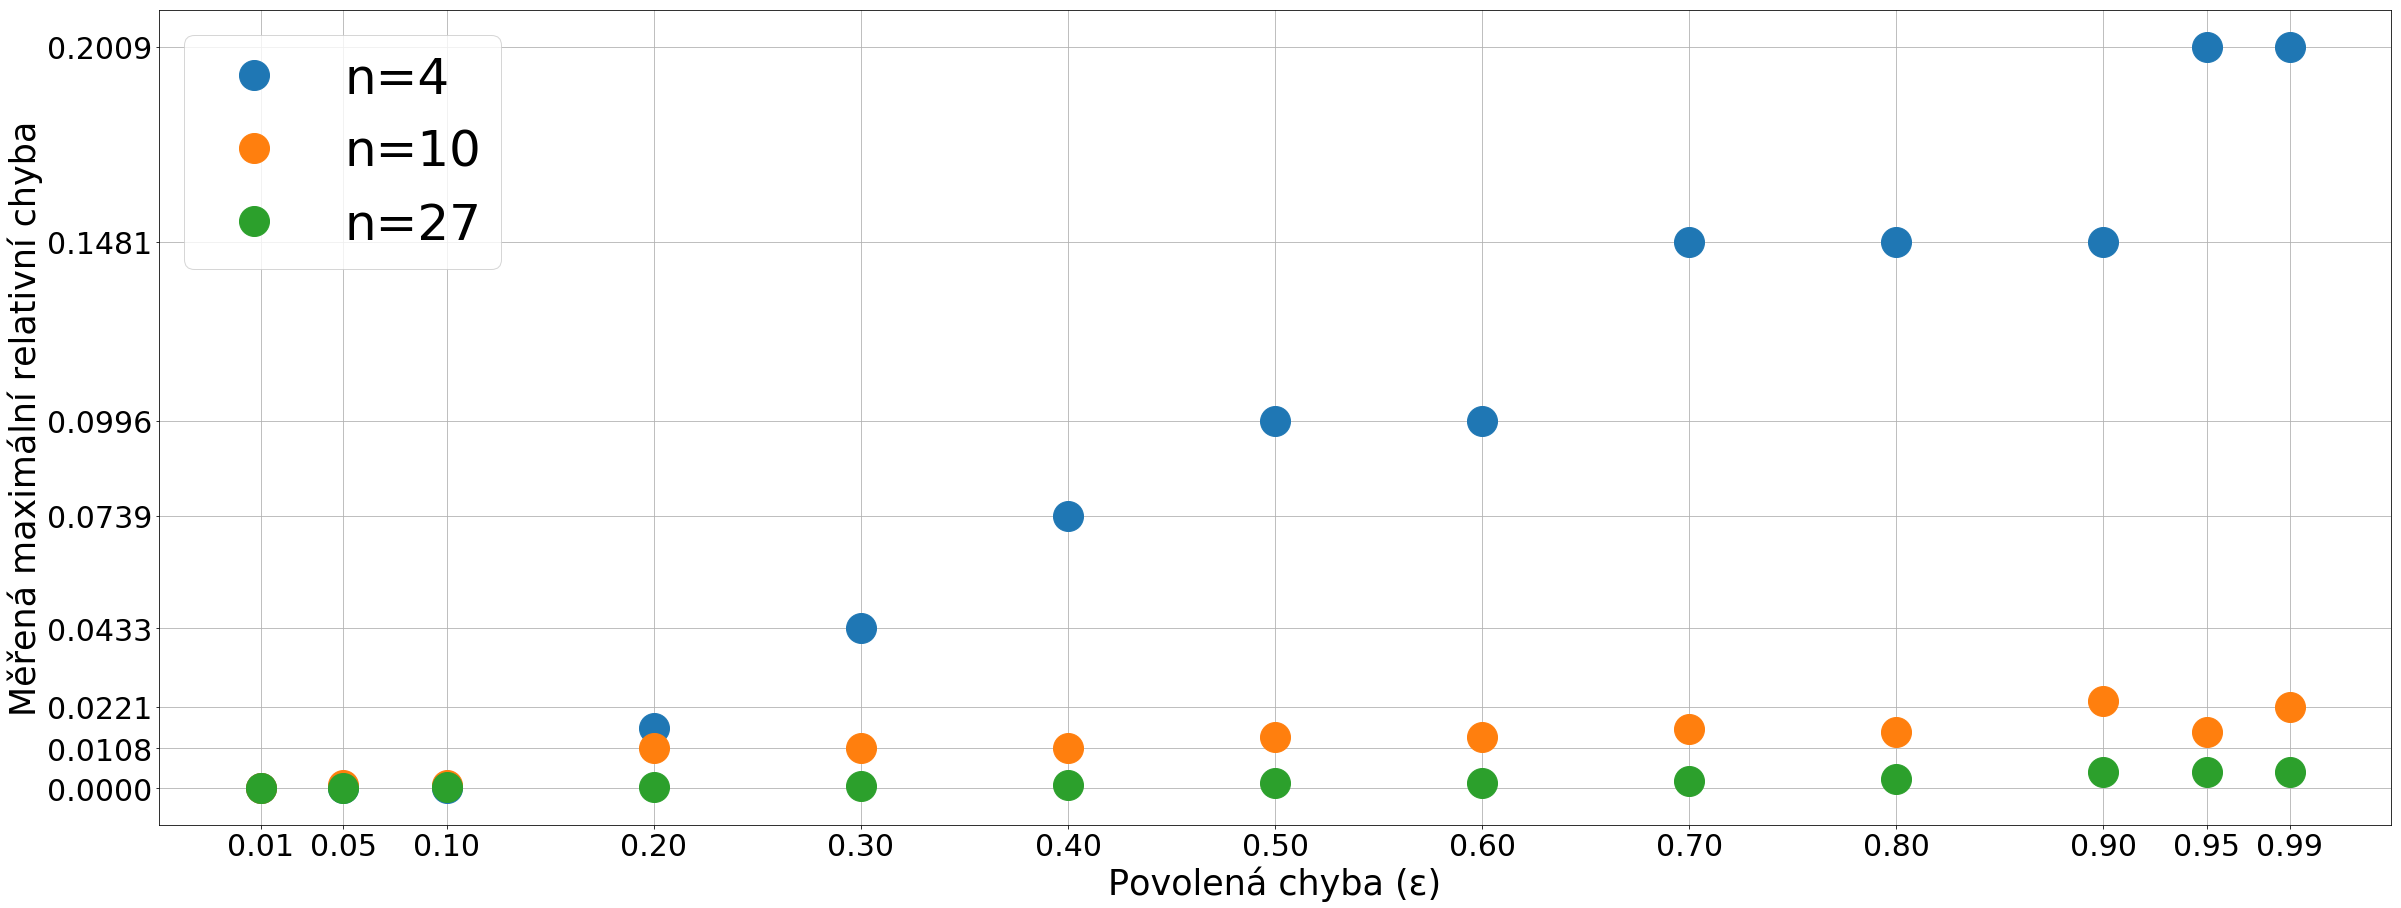

In [18]:
def cleanERR(RWr):
    pokus = RWr[errB]
    pokus = pokus.drop('errH', axis=1)
    pokus = pokus.max()
    pokus.index = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    return pokus

RW = RAW_DATA.loc[RAW_DATA['n'] == 4]
RW = pd.DataFrame()
pokus = pd.concat([cleanERR(RAW_DATA.loc[RAW_DATA['n'] == 4]),
                   cleanERR(RAW_DATA.loc[RAW_DATA['n'] == 10]),
                   cleanERR(RAW_DATA.loc[RAW_DATA['n'] == 27])], axis=1)
#RW = pd.merge( on=cleanERR(RAW_DATA.loc[RAW_DATA['n'] == 4].index))
do_plot(40, 15, pokus.index, pokus, 
        "Povolená chyba (ε)", 
        "Měřená maximální relativní chyba", 
        ["n=4","n=10","n=27"], 
        "FPTASerrEPS.pdf", 30, 1)



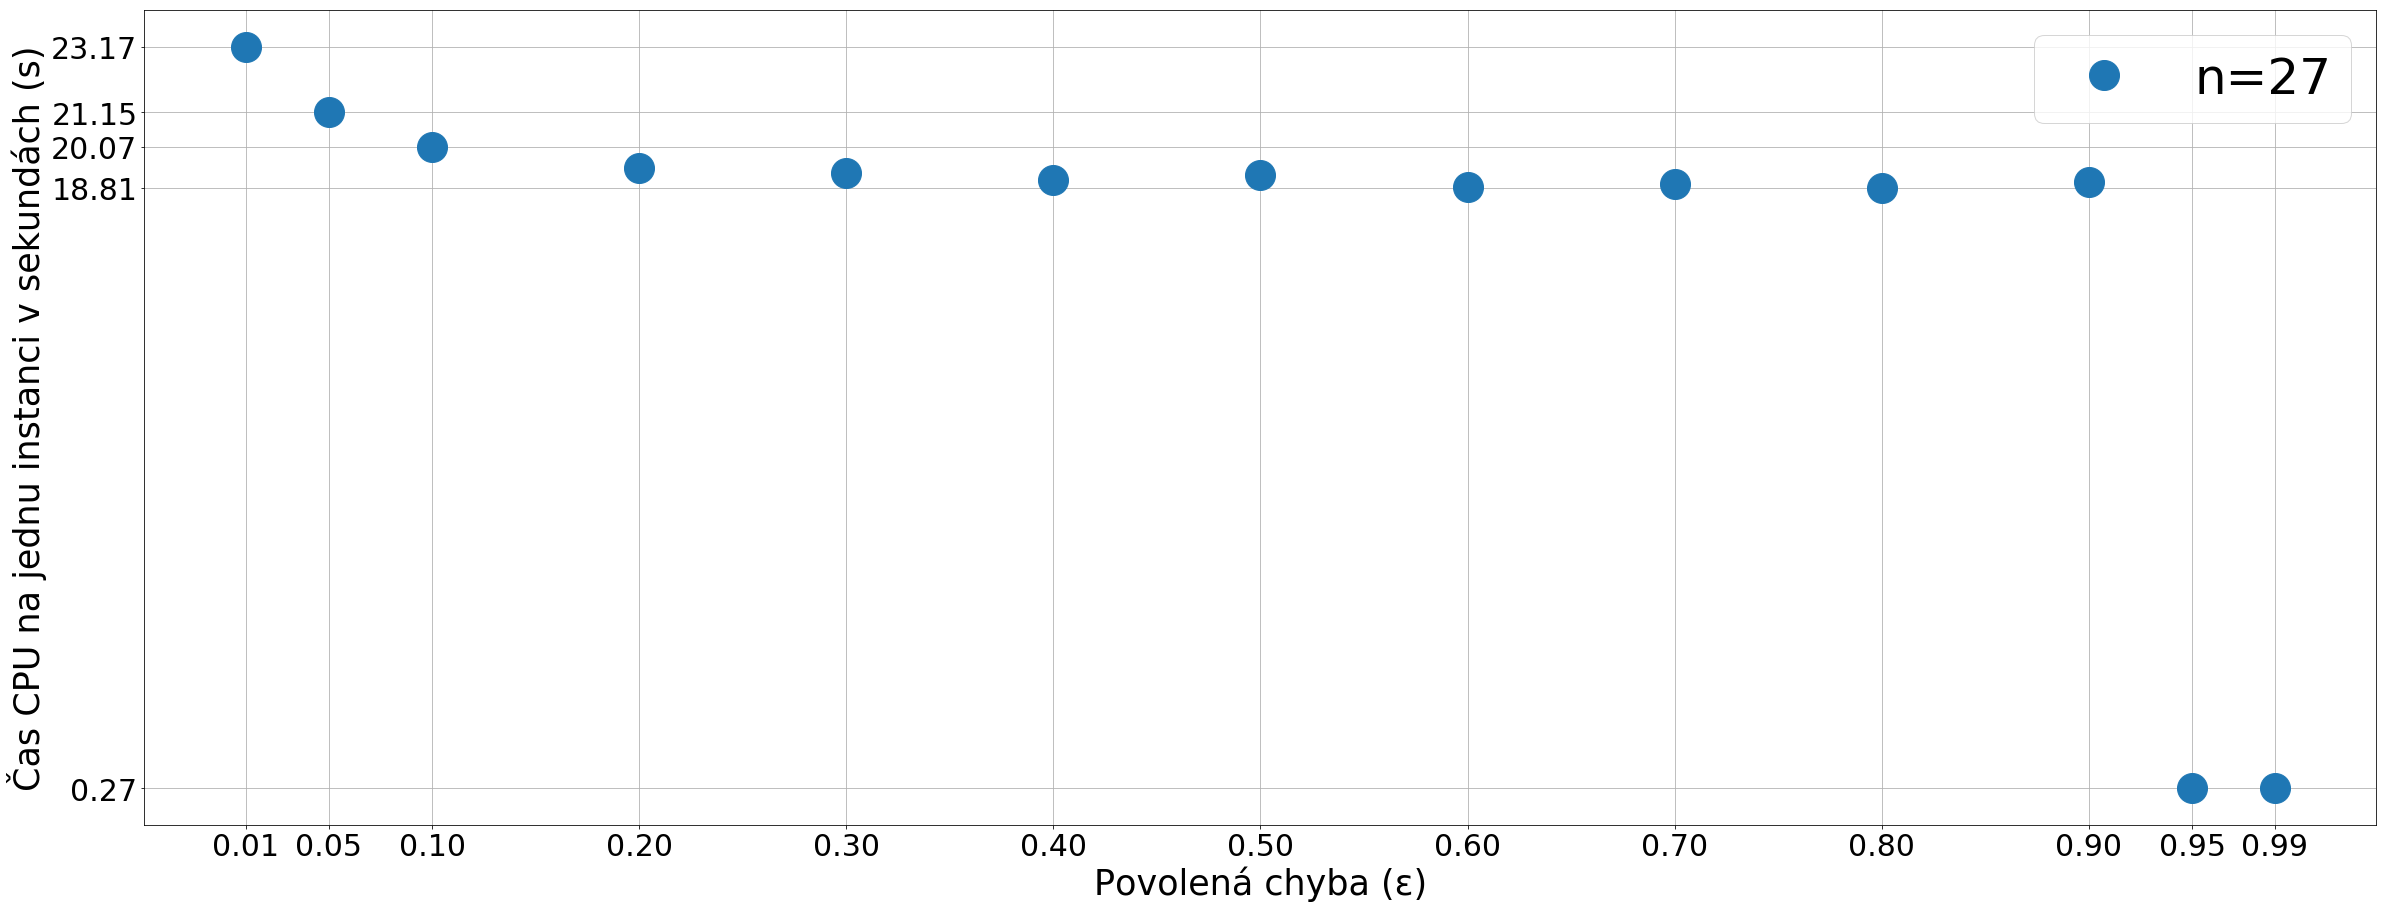

In [19]:
def cleanTime(RWr, drop, index):
    pokus = RWr[timeB]
    for i in drop:
        pokus = pokus.drop(i, axis=1)
    pokus = pokus.mean()
    pokus.index = index
    return pokus

remove = ['tB','tH','tDC','tDW','tBB']
idx = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
pokus = pd.concat([cleanTime(RAW_DATA.loc[RAW_DATA['n'] == 27], remove, idx)], axis=1)
do_plot(40, 15, pokus.index, pokus, 
        "Povolená chyba (ε)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ["n=27"], 
        "FPTASTimeEPS27.pdf", 30, 1000)



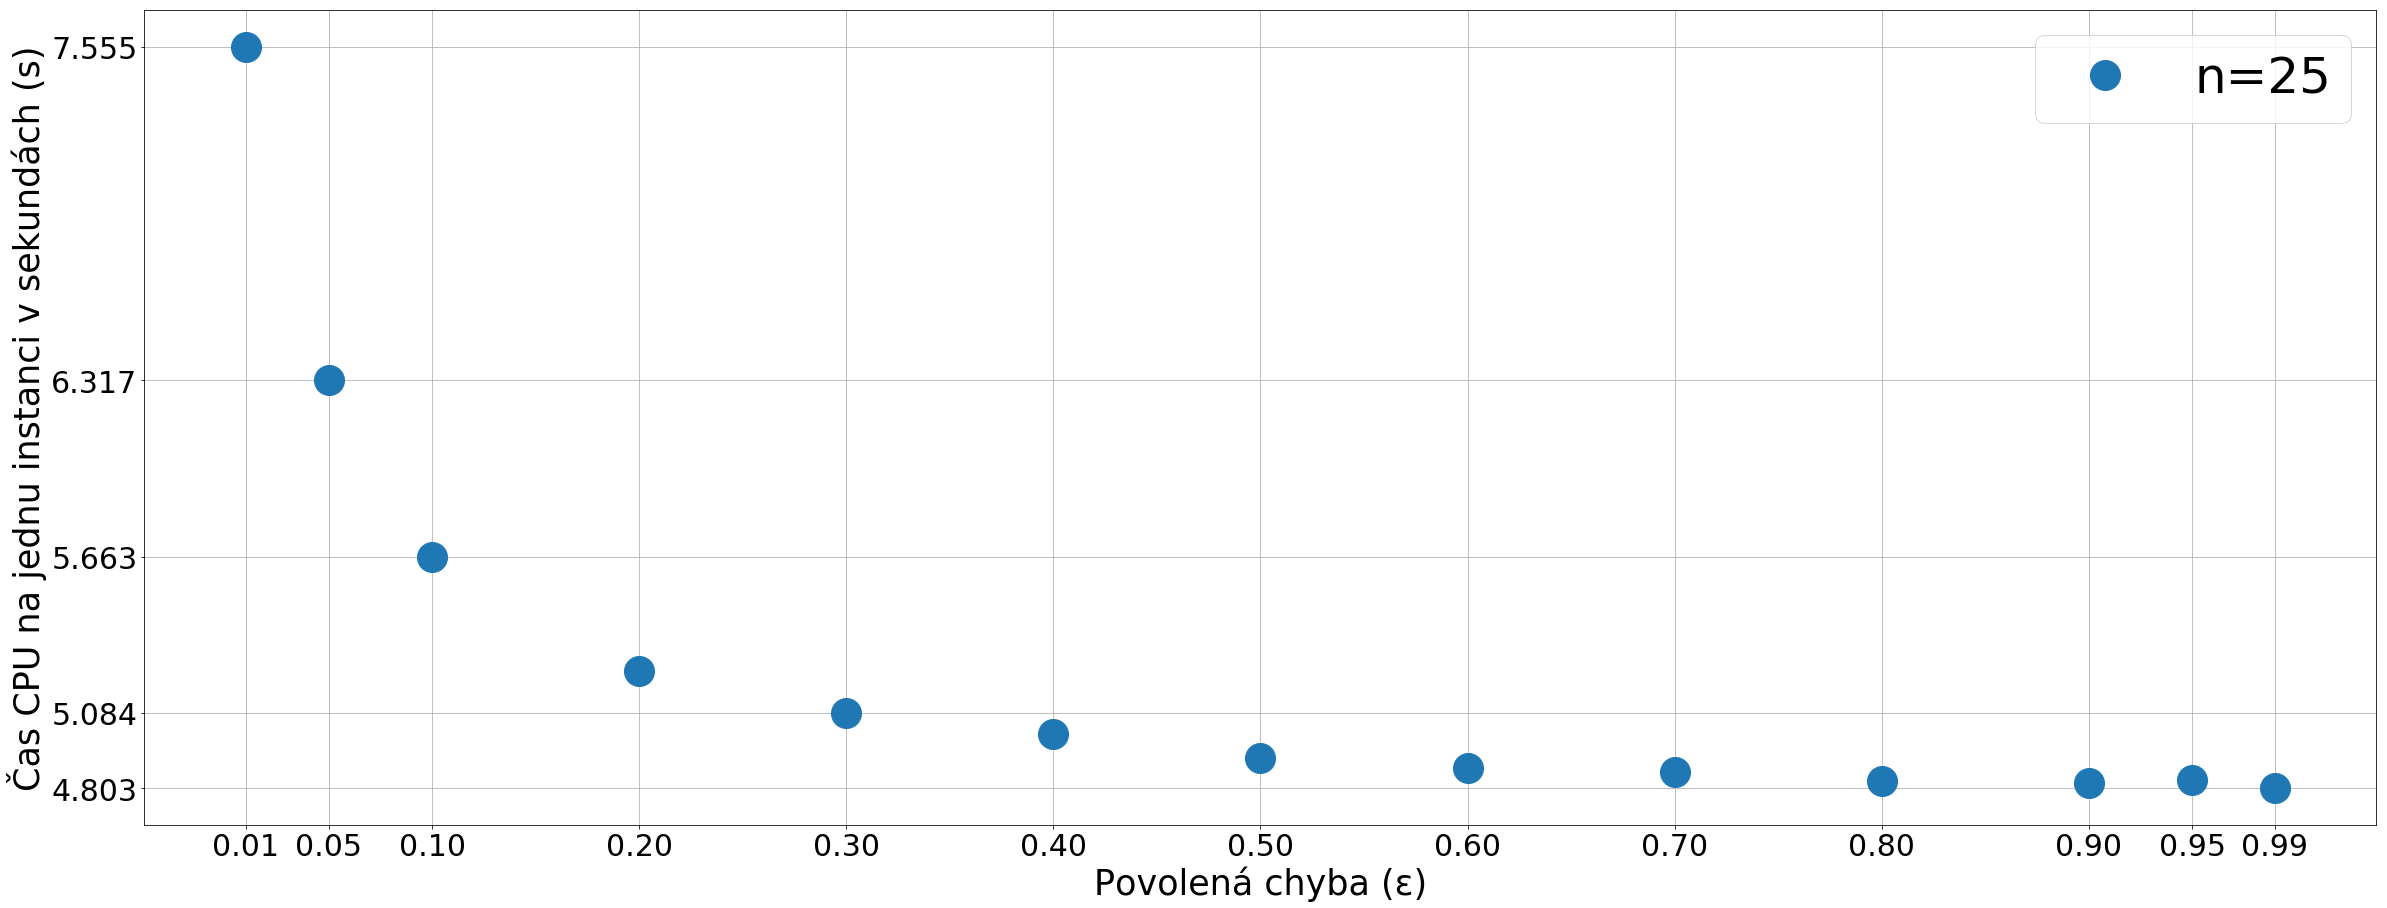

In [20]:
remove = ['tB','tH','tDC','tDW','tBB']
idx = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
pokus = pd.concat([cleanTime(RAW_DATA.loc[RAW_DATA['n'] == 25], remove, idx)], axis=1)
do_plot(40, 15, pokus.index, pokus, 
        "Povolená chyba (ε)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ["n=25"], 
        "FPTASTimeEPS25.pdf", 30, 1000)